In [1]:
# For data wrangling 
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [145]:

np.random.seed(42)



In [2]:
df = pd.read_csv('data/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [4]:
# get shape of df
df.shape

(10000, 14)

The given results suggest that a data frame (df) has 10,000 rows and 14 columns. Before conducting exploratory analysis and prediction modelling on this dataset, a review is necessary to determine which attributes or variables are essential for the analysis and what kind of data manipulation is required to prepare the data for the analysis.

The review may involve checking for missing values, data types, inconsistencies, outliers, and other data quality issues. It may also involve selecting relevant variables based on domain knowledge, research questions, or statistical significance.

Once the necessary attributes have been identified, data manipulation techniques such as data cleaning, data transformation, and feature engineering may be employed to prepare the data for analysis. These techniques can help to improve the quality and relevance of the data, as well as create new variables that can enhance the predictive power of the model.

Moreover, reviewing the shape of the dataset and identifying necessary attributes and data manipulation requirements is an essential step in the exploratory analysis and prediction modelling processes. It helps to ensure that the analysis is based on relevant and reliable data and that the resulting models are accurate and useful for decision-making.

# Dataset review & preparation

In [6]:
df.columns


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
# give summary of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


The given statement provides information about the structure and data types of a dataset.

The first line of the statement indicates that the dataset is a pandas DataFrame with a RangeIndex of 10,000 entries, numbered from 0 to 9,999.

The second line indicates that there are 14 columns in the dataset, each with a specific name and data type. The names of the columns are listed on the left, and the data types are specified on the right.

The Non-Null Count for each column indicates the number of non-missing or complete observations in that column. In this case, all columns have 10,000 non-null or complete observations.

The Dtype for each column indicates the data type of the values in that column. For example, the RowNumber, CustomerId, CreditScore, Age, Tenure, NumOfProducts, HasCrCard, IsActiveMember, and Exited variables are all of the integer data type (int64). The Surname, Geography, and Gender variables are of the object data type. The Balance and EstimatedSalary variables are of the float64 data type.

Understanding the data types of the variables is important for data cleaning and analysis purposes. Different data types require different types of manipulation, and some statistical techniques may only be applied to certain data types.

All in all, this information gives an overview of the dataset's structure and data types, which can be used to inform subsequent data analysis and modeling techniques.

In [8]:
# Check columns list and missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

The output indicates that the column names and number of missing values in a dataset have been verified. RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, and Exited are among the columns.

The second part, represented by the dtype: int64 data type, displays the number of missing values for each column. There appear to be no missing values in any of the columns.

In [9]:
# Get unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Understanding the unique count for each variable is important for exploring and understanding the dataset. It provides insight into the range and distribution of values for each variable and can help inform data cleaning and analysis techniques.

The given statement shows the unique count for each variable in a dataset.

The unique count represents the number of distinct values for each variable in the dataset. For example, the RowNumber and CustomerId variables have a unique count of 10,000, indicating that each row has a unique identifier.

The Surname variable has a unique count of 2,932, indicating that there are 2,932 unique surnames in the dataset. The CreditScore variable has a unique count of 460, suggesting that there are 460 distinct credit scores in the dataset.

The geography variable has a unique count of 3, indicating that there are three unique locations in the dataset. The gender variable has a unique count of 2, indicating that there are two unique gender categories in the dataset.

The Age variable has a unique count of 70, indicating that there are 70 different ages in the dataset. The tenure variable has a unique count of 11, suggesting that there are 11 unique tenures in the dataset.

The Balance variable has a unique count of 6,382, indicating that there are 6,382 unique balance values in the dataset. The NumOfProducts variable has a unique count of 4, suggesting that there are four different types of products in the dataset.

The HasCrCard and IsActiveMember variables have a unique count of 2, indicating that they have two unique values.

Finally, the EstimatedSalary and Exited variables have unique counts of 9,999 and 2, respectively. This indicates that there are 9,999 unique estimated salaries in the dataset, and that the Exited variable has two possible values, representing whether a customer has exited or not.`

In [10]:
# Drop the columns as explained above
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

`*comment*`


The given statement suggests that the first two attributes in the dataset, `RowNumber and CustomerId`, are specific to individual customers and are not informative for analysis or modeling purposes.

RowNumber is simply a sequential numbering of the rows, while CustomerId is a unique identifier for each customer. Neither of these attributes is likely to provide any meaningful information about customer behavior or churn.

As for the `Surname` attribute, it is excluded because it could lead to profiling. Profiling is the practise of using personal characteristics or attributes, such as race, gender, or surname, to make assumptions or decisions about individuals or groups. Excluding the Surname attribute ensures that customer data is not used for discriminatory purposes.

Furthermore, excluding these attributes is a common practice in data analysis and modeling to remove irrelevant or sensitive information from the dataset and prevent any negative consequences.

In [11]:
# Review what is left of the data frame
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


`*comment*`

The given text appears to be a sample of the dataset, which includes 10,000 rows and 14 columns. The columns represent various attributes related to bank customers and their account information.

The first five columns are CreditScore, Geography, Gender, Age, and Tenure, which provide basic demographic and account information about each customer. CreditScore is a numerical value representing the customer's credit score. Geography indicates the country of origin of the customer. Gender is the gender of the customer. Age is the age of the customer. Tenure indicates the number of years the customer has been with the bank.

The next five columns are Balance, NumOfProducts, HasCrCard, IsActiveMember, and EstimatedSalary, which provide additional information about each customer's account and product usage. Balance indicates the customer's account balance. NumOfProducts is the number of products that the customer has purchased. HasCrCard indicates whether the customer has a credit card with the bank. IsActiveMember indicates whether the customer is an active member of the bank. EstimatedSalary is the estimated salary of the customer.

Exited, the last column, shows whether or not the customer left (1 or 0). This is the target variable for the analysis and modelling, and the objective is to predict whether a customer is likely to churn or not based on the other attributes in the dataset. Additionally, this dataset seems appropriate for exploratory data analysis and predictive modelling in order to pinpoint the elements that contribute to customer churn and create a predictive model that can foretell whether a customer will leave or stay.


In [12]:
# Check variable data types
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Therefore, we have 5 continuous numerical variables and 6 categorical variables.

In [13]:
# Group columns to their respective group

In [14]:
numeric_columns = df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts',
                     'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']]

In [15]:
numeric_columns.head()

,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,1,1,1,101348.88,1
1,608,41,1,1,0,1,112542.58,0
2,502,42,8,3,1,0,113931.57,1
3,699,39,1,2,0,0,93826.63,0
4,850,43,2,1,1,1,79084.10,0


In [16]:
categorical_columns = df[['Geography', 'Gender']]
categorical_columns.head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [17]:
target_column = df[['Exited']]
target_column.head()

,Exited
0,1
1,0
2,1
3,0
4,0


# Exploratory Analysis

Exploratory Data Analysis (EDA) is the process of examining and understanding the data to extract insights and detect patterns, trends, and anomalies. It involves applying various statistical and visualization techniques to summarise and explore the main characteristics of the data, such as its distribution, central tendency, variability, correlation, and association with other variables. EDA is a crucial step in the data analysis workflow, as it helps to identify potential issues and biases in the data, formulate hypotheses, and guide the selection and validation of the predictive models.

##### Descriptive statistics:

In [18]:
df.describe()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


This descriptive statistics output provides information on the distribution of each variable in the dataset. It shows the count of values, mean, standard deviation, minimum, maximum, and quartile values for each variable. The mean credit score is 650.53, the mean age is 38.92, and the mean tenure is 5.01. The mean balance is 76485.89, and the mean estimated salary is 100090.24. The dataset has a minimum credit score of 350 and a maximum credit score of 850. The maximum age is 92, and the minimum age is 18. The minimum tenure is 0, and the maximum tenure is 10. The minimum balance is 0, and the maximum balance is 250898.09. The majority of customers have not exited, with a mean exit rate of 0.2037.

#### Checking the correlation between variables

In [19]:
numeric_columns.corr()

,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,0.013444,0.022583,-0.028362,0.007784,-0.014001
NumOfProducts,0.012238,-0.030680,0.013444,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,-0.047820,-0.007138,-0.156128,0.012097,1.000000


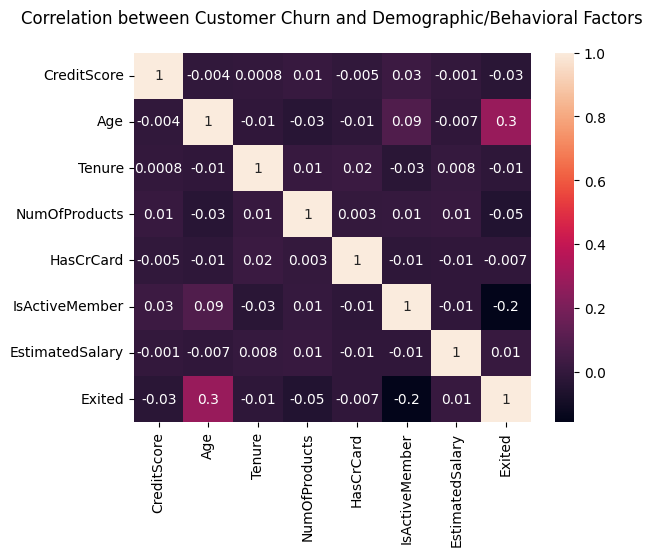

In [20]:
# plot seaborn correlation
correlation = numeric_columns.corr() 
plt.title("Correlation between Customer Churn and Demographic/Behavioral Factors\n")

# Generate the heatmap and Display the plot
sns.heatmap(correlation, annot=True, fmt='.1g');

`*comment*`

The correlation matrix shows the correlation coefficients between each pair of variables. The coefficients range from -1 to 1, where -1 indicates a perfect negative correlation, 0 indicates no correlation, and 1 indicates a perfect positive correlation.

Looking at the matrix, we can see that:

- CreditScore has a weak positive correlation with NumOfProducts and IsActiveMember, and a weak negative correlation with Exited.
- Age has a moderate positive correlation with Exited, indicating that older customers are more likely to exit the bank.
- Tenure has a weak positive correlation with NumOfProducts and a weak negative correlation with Exited.
- NumOfProducts has a weak positive correlation with tenure and a weak negative correlation with exit.
- HasCrCard has weak negative correlations with CreditScore and IsActiveMember.
- IsActiveMember has a weak positive correlation with CreditScore and a moderate negative correlation with Exited, - indicating that active members are less likely to exit the bank.
- EstimatedSalary has a weak positive correlation with NumOfProducts.
- Exited has moderate positive correlations with Age and IsActiveMember, indicating that older customers and inactive members are more likely to exit the bank.

Additionally, the correlations are not very strong, showing that the variables are not strongly correlated.

#### Counting unique values in categorical variables:

by geography

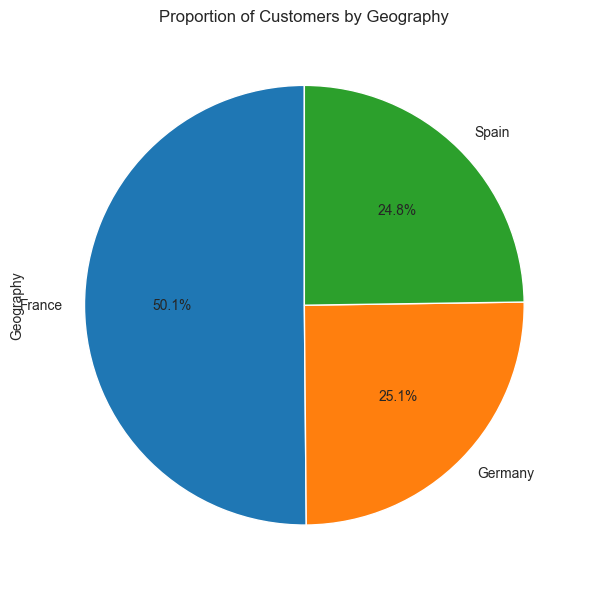

In [38]:
plt.figure(figsize=(6,6))
plt.title('Proportion of Customers by Geography')
df['Geography'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.tight_layout()
plt.show()


The pie chart shows the proportion of customers in a bank from different countries. France has the largest share of customers with 5014, which is approximately 50.1% of the total customer base. Germany has 2509 customers, which represents approximately 25.1% of the customer base, while Spain has 2477 customers, which represents approximately 24.8% of the customer base. Therefore, the majority of customers in this bank are from France.

by gender

In [43]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

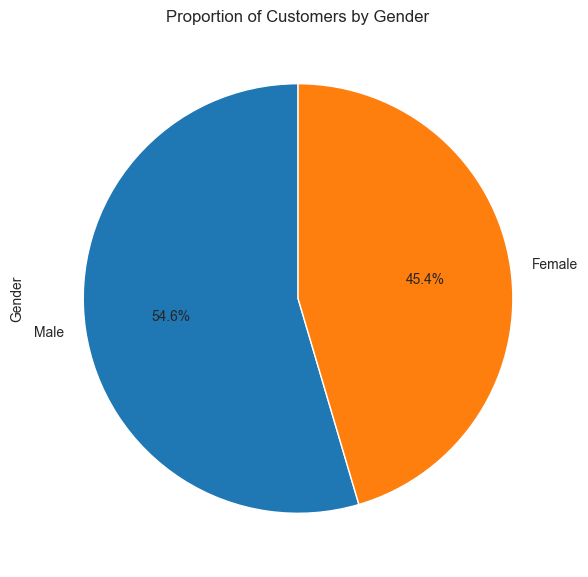

In [42]:
plt.figure(figsize=(6,6))
plt.title('Proportion of Customers by Gender')
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.tight_layout()
plt.show()


The pie chart depicts the gender breakdown of clients. Males account for around 54.57% of the whole customer base, while females account for approximately 45.43% of the total customer base.

#### Distribution plots for continuous variables:

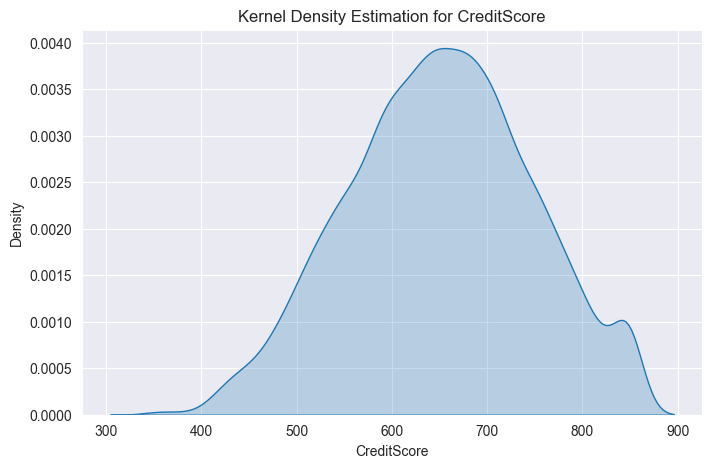

In [45]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='CreditScore', fill=True)
plt.title('Kernel Density Estimation for CreditScore')
plt.xlabel('CreditScore')
plt.ylabel('Density')
plt.show()


`*comment*`

The KDE plot shows that the CreditScore variable has a slightly right-skewed distribution, with most observations concentrated to the left and a few outliers to the right. The mean is slightly higher than the median, indicating a right-skewed distribution. While the distribution appears to be mostly normal, there is a small peak in the centre, indicating some underlying structure or pattern in the data that causes the skewness. Additionally, the variable is not entirely normal and shows some deviations from normality.

age Kernel Density Estimation

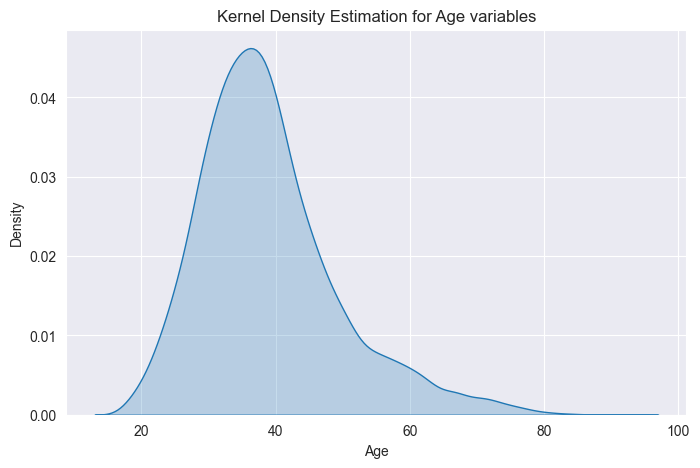

In [47]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='Age', fill=True)
plt.title('Kernel Density Estimation for Age variables')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


`*comment*`

The Age variable's distribution plot, based on the Kernel Density Estimation (KDE), is skewed to the left, with a higher concentration of observations on the right side of the plot and a long tail on the left. This suggests that the majority of customers fall in the age range of 30 to 50, with progressively fewer customers as the age increases. The distribution appears to be relatively smooth and unimodal, with no significant peaks or deviations from normality.

balance Kernel Density Estimation

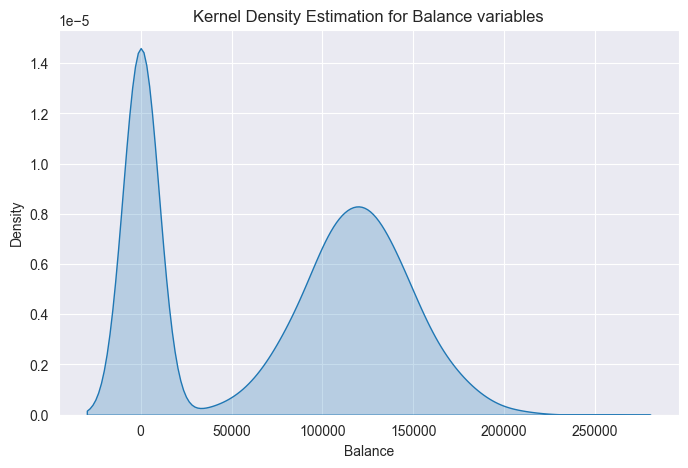

In [49]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='Balance', fill=True)
plt.title('Kernel Density Estimation for Balance variables')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.show()


`*comment*`

Based on the Kernel Density Estimation plot, the "Balance" variable appears to have a roughly normal distribution, with most of the values concentrated around 0.00. The plot shows a high peak around 0 with a density above 1.4 and drops sharply around 40,000 and then increases after 50,000. After that, there is a second high peak between 100,000 and 190,000 with a density above 0.8. However, there are also a few outliers with very high balances, as indicated by the small number of values that are not 0.00. Overall, the plot suggests that the majority of customers have low balances, with a few customers having very high balances.

EstimatedSalary Kernel Density Estimation

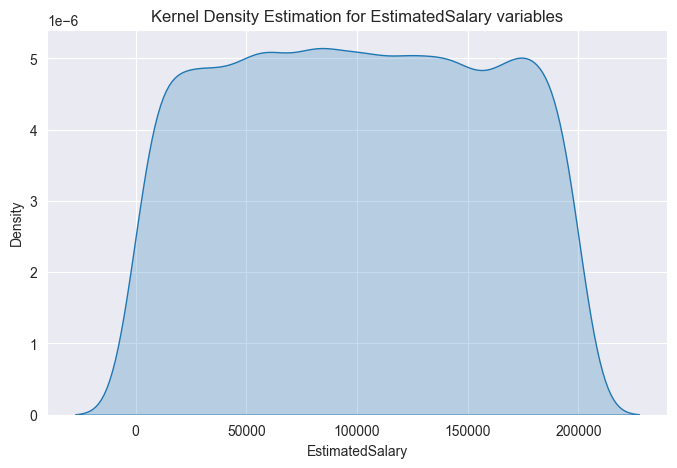

In [52]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='EstimatedSalary', fill=True)
plt.title('Kernel Density Estimation for EstimatedSalary variables')
plt.xlabel('EstimatedSalary')
plt.ylabel('Density')
plt.show()


`*comment*`

This is plot of the EstimatedSalary variable. Each value of the variable is listed along with the number of times it appears in the dataset. There are no clear patterns in the distribution, as the values appear to be randomly distributed.

#### Voilin plots for continuous variables by categorical variables:

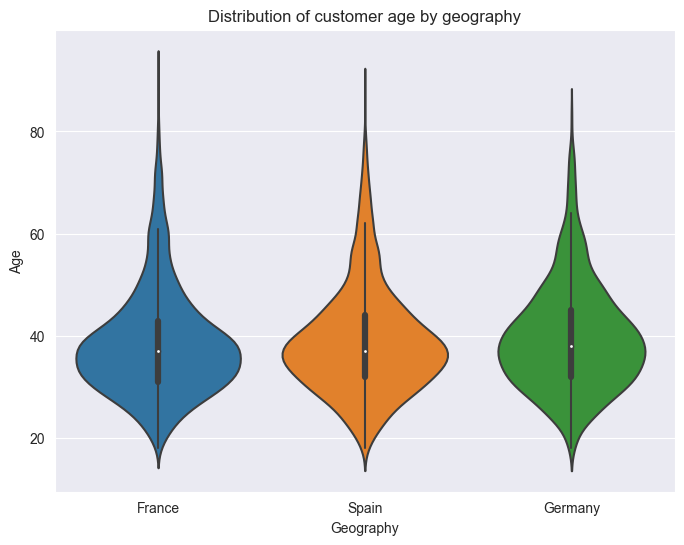

In [33]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Geography', y='Age', data=df)
plt.title('Distribution of customer age by geography')
plt.xlabel('Geography')
plt.ylabel('Age')
plt.show()


the violin plot depicts the age distribution of customers in various geographic areas unlike germany and spain which have smaller distributions with peaks at 38 and 40 respectively france has a greater dispersion the whiskers range in length from 18 to 92 years old demonstrating a large age variance across all locations the plot also depicts a france outlier whose age is older than that of the other nations the plot also suggests that there are some differences in the distribution of ages among geographical regions

CreditScore by Gender

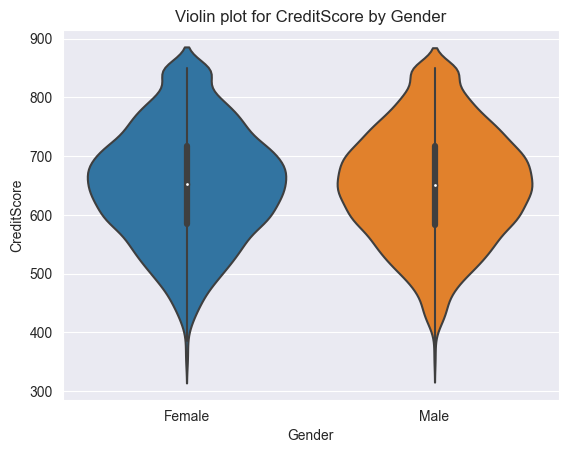

In [32]:
plt.title('Violin plot for CreditScore by Gender')
sns.violinplot(data=df, x='Gender', y='CreditScore')
plt.show();


The distribution of credit scores for male and female consumers is depicted by the violin plot. Both genders' plots have a similar outline, with a peak about 650 and a range of roughly 350 to 850. However, the distribution of the plot for females is a little bit wider than it is for males, suggesting that there may be a little bit more variation in the credit ratings of female consumers. Overall, the figure implies that there are no appreciable credit score discrepancies between male and female clients.

#### proportion of customer churned and retained

instead of piechart, we using bar chart

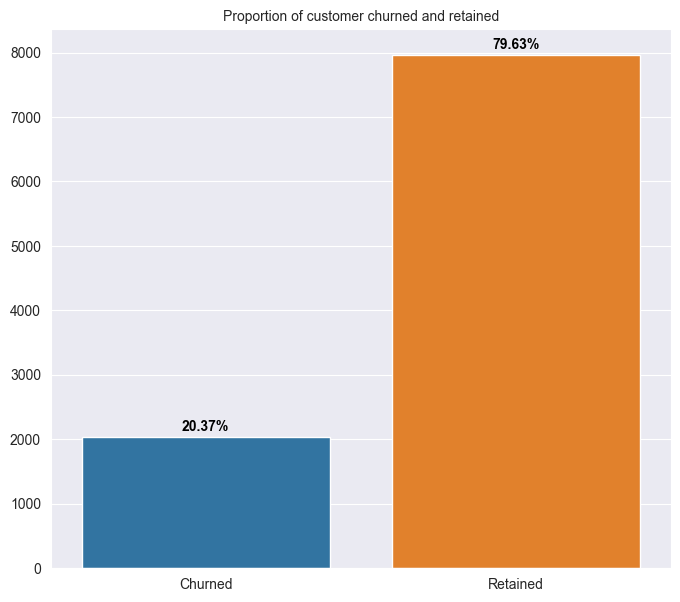

In [29]:
# import matplotlib.pyplot as plt
# import seaborn as sns

sns.set_style('darkgrid')

churned_count = df.Exited[df['Exited']==1].count()
retained_count = df.Exited[df['Exited']==0].count()

fig, ax = plt.subplots(figsize=(8, 7))

sns.barplot(x=['Churned', 'Retained'], y=[churned_count, retained_count], ax=ax)

ax.set_title('Proportion of customer churned and retained', size=10)

for i, v in enumerate([churned_count, retained_count]):
    ax.text(i, v + 100, str(round(v/df.Exited.count()*100, 2)) + "%", color='black', ha='center', fontweight='bold')

plt.show()


`*comment*`

According to the data presented, the churn rate among consumers is roughly 20.37%. As a result, a possible baseline model could anticipate that 20% of customers will churn. Yet, because 20% is a small number, it is critical to guarantee that the chosen model can reliably predict this group. This is critical for the bank because identifying and retaining customers who are prone to churn is a top concern. As a result, great churn prediction accuracy is necessary, even at the expense of projecting kept customers, as the retained rate is 79.63%.

In [64]:
# # Create a grid of subplots
# g = sns.catplot(data=df, x='Geography', hue='Gender', col='Exited', kind='count', ax=axarr[0][0])
# h = sns.catplot(data=df, x='HasCrCard', hue='Gender', col='Exited', kind='count', ax=axarr[0][1])
# i = sns.catplot(data=df, x='IsActiveMember', hue='Gender', col='Exited', kind='count', ax=axarr[1][0])

# # Set title for the whole figure
# g.fig.suptitle('Relationship between Exited status and Gender/Geography', y=1.05, fontsize=16)

# # Add title and axis labels for each subplot
# g.set_axis_labels('Geography', 'Count')
# h.set_axis_labels('Has Credit Card', 'Count')
# i.set_axis_labels('Is Active Member', 'Count')

# # Show the plot
# plt.show()


/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


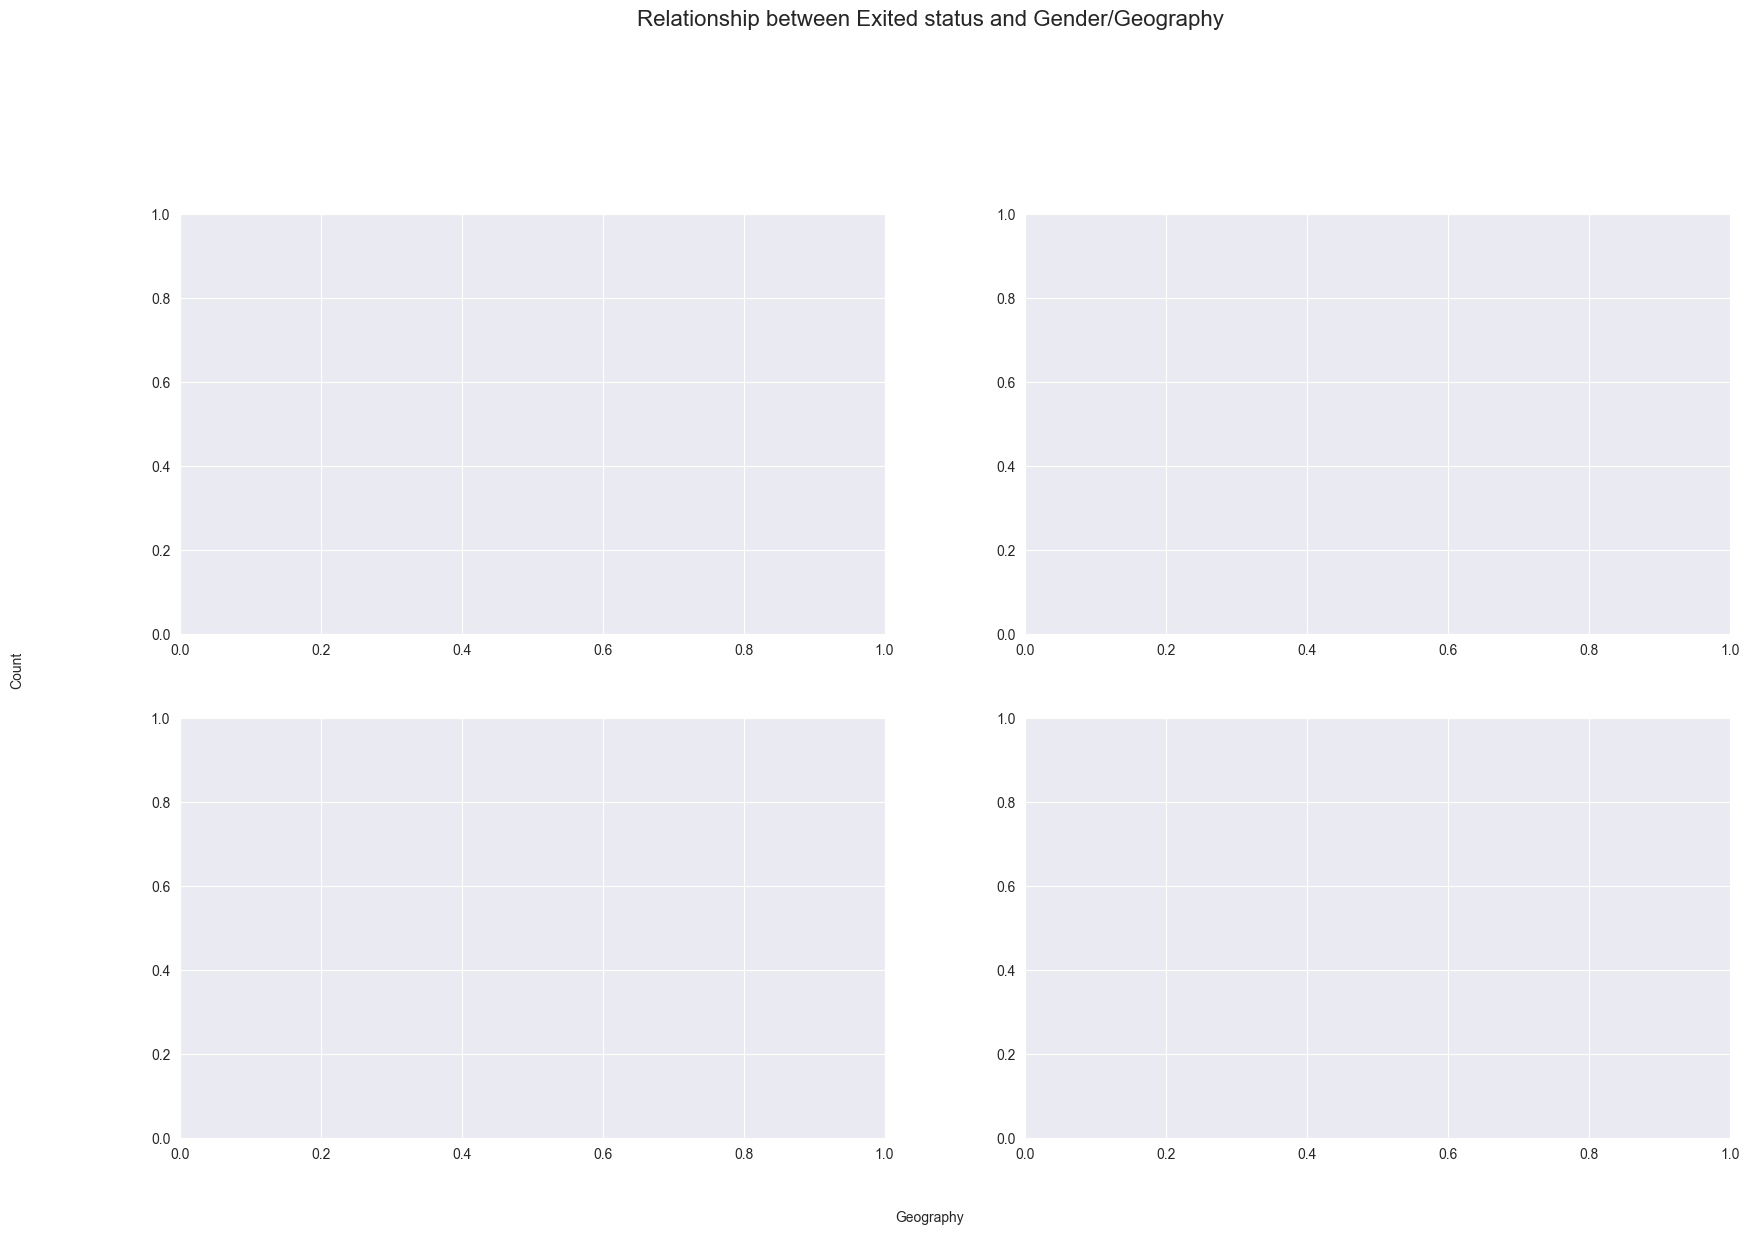

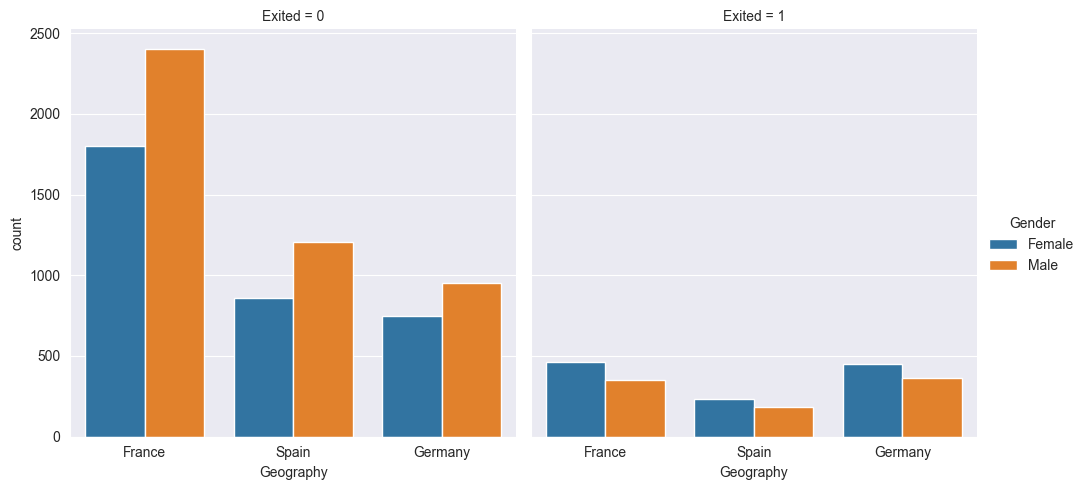

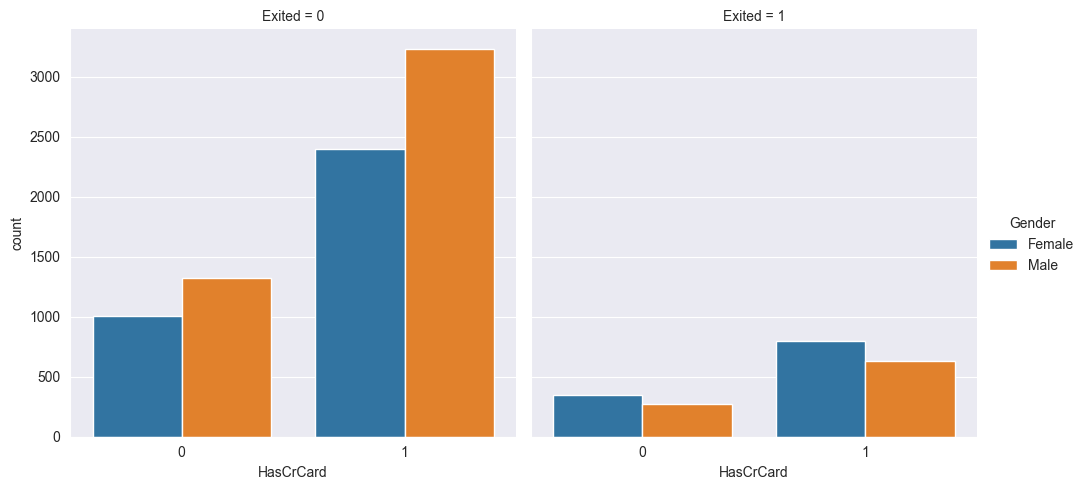

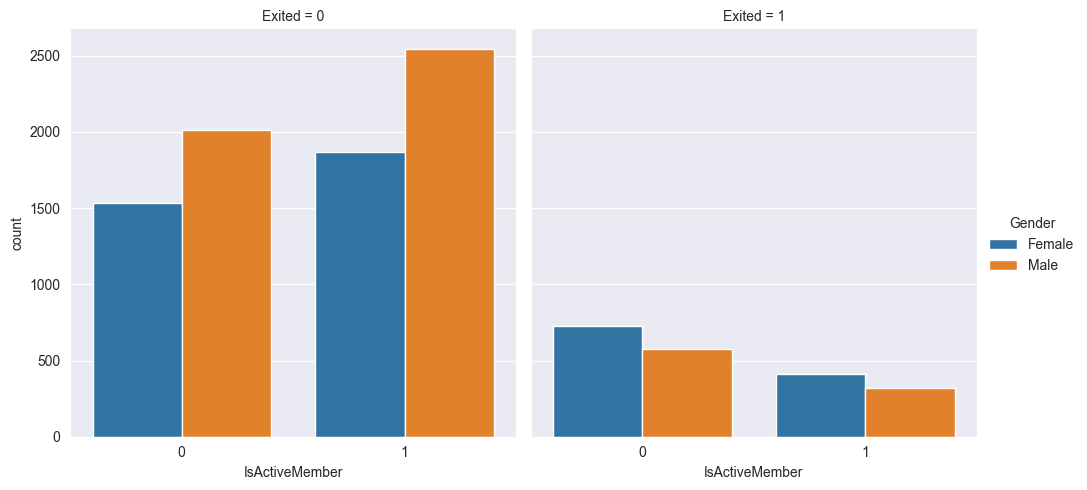

In [61]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Relationship between Exited status and Gender/Geography', y=1.05, fontsize=16)

sns.catplot(x='Geography', hue='Gender', col='Exited', data=df, kind='count', ax=axarr[0][0])
sns.catplot(x='HasCrCard', hue='Gender', col='Exited', data=df, kind='count', ax=axarr[0][1])
sns.catplot(x='IsActiveMember', hue='Gender', col='Exited', data=df, kind='count', ax=axarr[1][0])

# Add title and axis labels
fig.text(0.5, 0.04, 'Geography', ha='center')
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical')

# Show the plot
plt.show()


<AxesSubplot: xlabel='IsActiveMember', ylabel='count'>

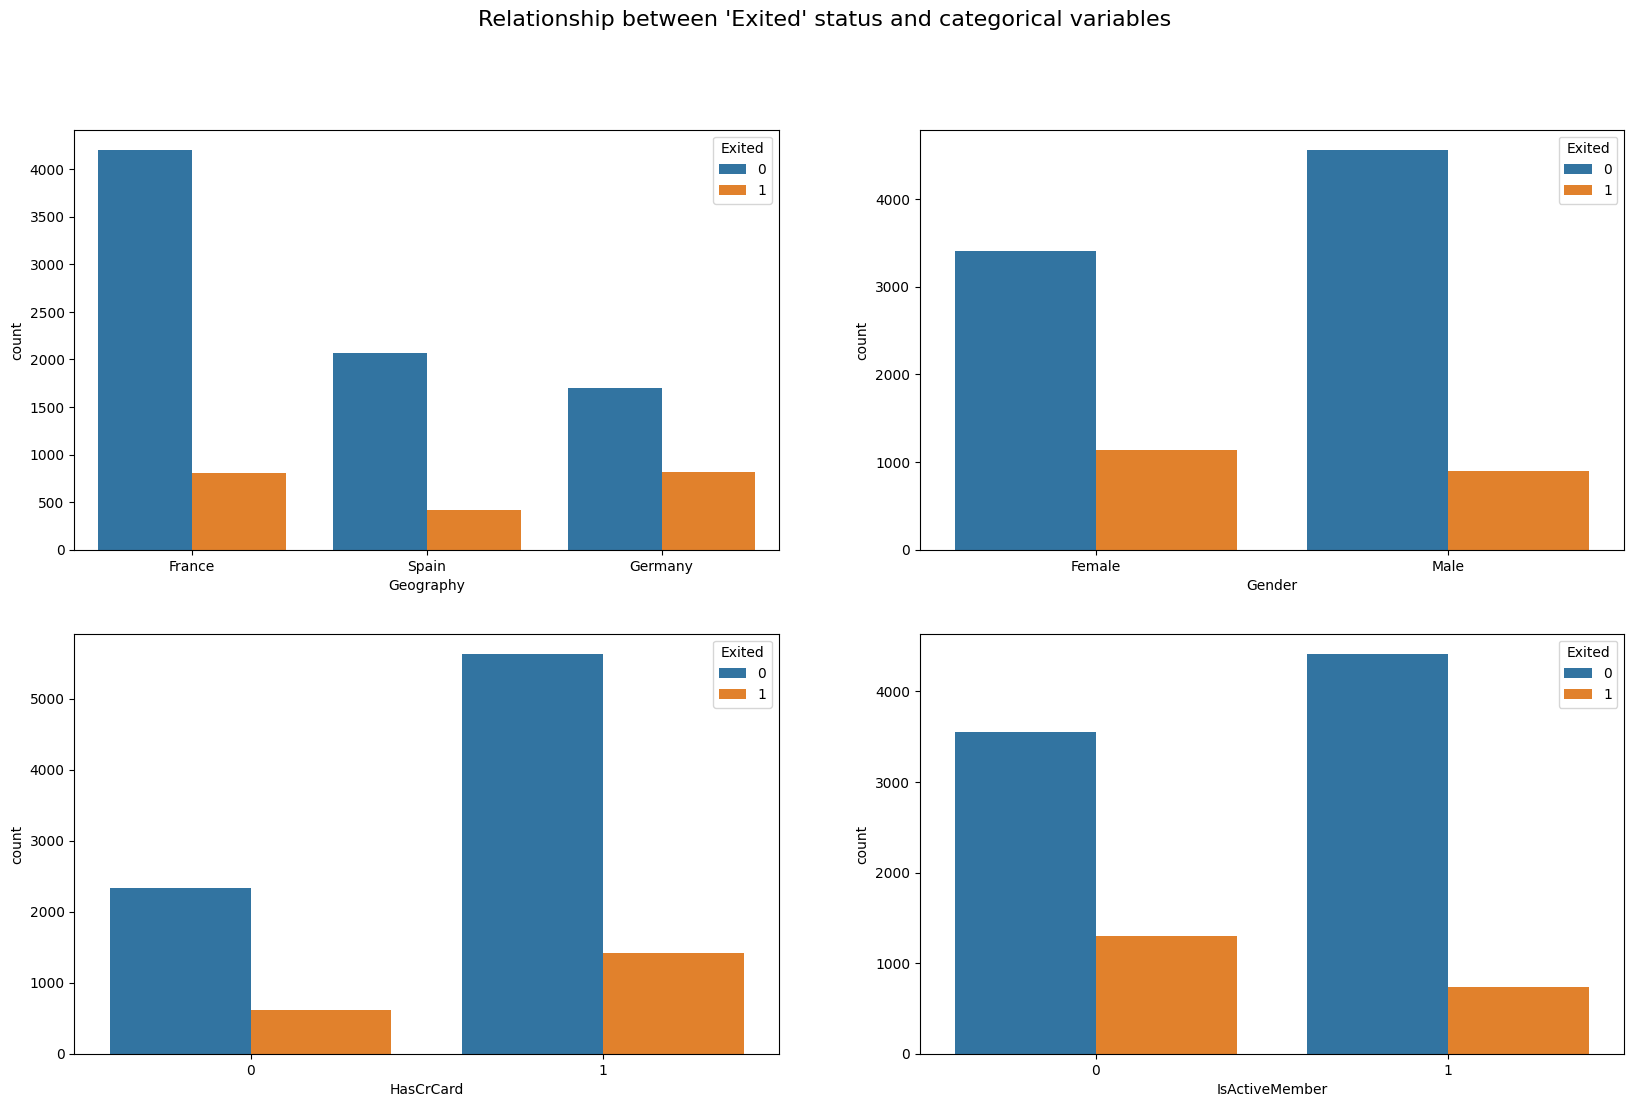

In [83]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle("Relationship between 'Exited' status and categorical variables", fontsize=16)
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])


title :"The Relationship Between Churn Status and Categorical Variables"

`*comment*`

The majority of the data is from persons in France, and the proportion of churned customers is inversely related to the population of customers, suggesting a possible problem with the bank's resources in areas with fewer clients. The proportion of churned female customers is greater than that of churned male customers. Interestingly, the majority of churned customers have credit cards, although this may be a coincidence given that the majority of customers have credit cards. 

Unsurprisingly, greater churn is observed among inactive members. The high overall proportion of inactive members indicates a need for a programme to turn this group into active customers, which would have a positive impact on customer churn.

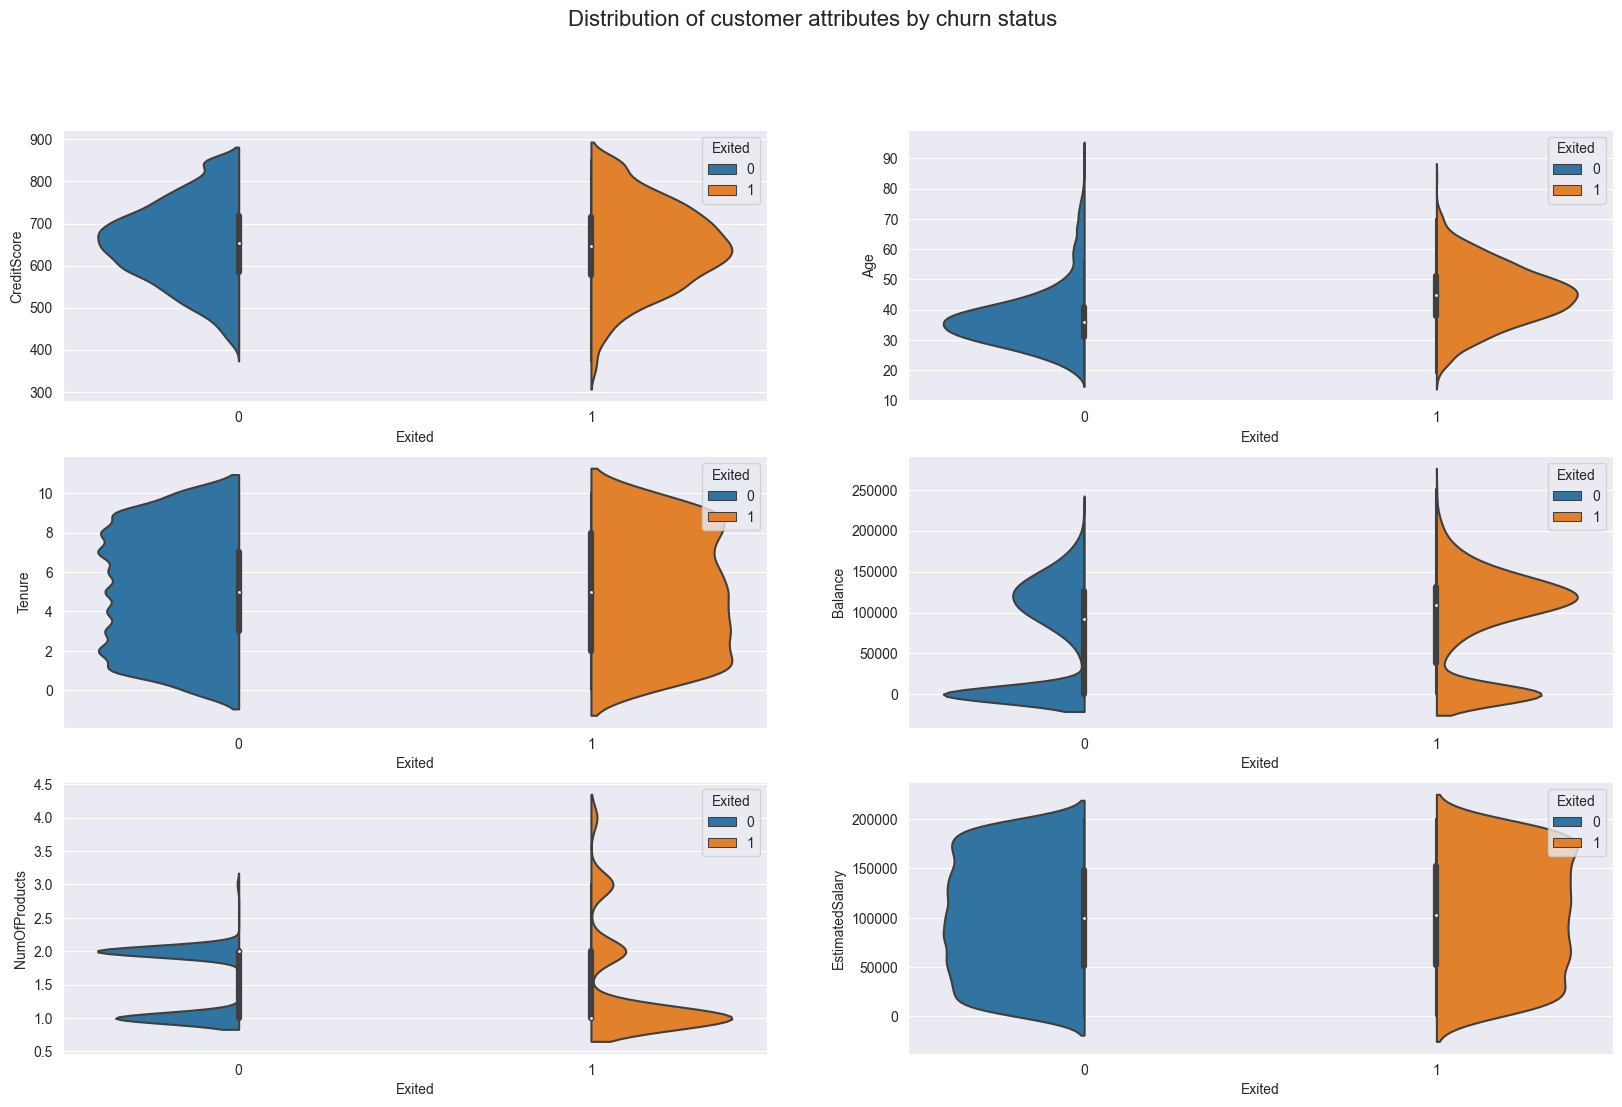

In [30]:
fig, axes = plt.subplots(3, 2, figsize=(20, 12))
fig.suptitle("Distribution of customer attributes by churn status", fontsize=16)
attrs = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for i, attr in enumerate(attrs):
    sns.violinplot(x='Exited', y=attr, hue='Exited', data=df, ax=axes[i//2][i%2], split=True)


The violin plot shows the distribution of customer attributes for both churned and retained customers. It is observed that credit score has a similar distribution for both groups, indicating that it may not be a strong predictor of churn. However, the age of customers who churned appears to be higher than those who retained, suggesting that age may be a significant factor in predicting churn.

The plot also indicates that customers who have either spent too little or too much time with the bank have a higher probability of churning. This has implications for the bank's customer acquisition and retention strategies. Interestingly, the analysis shows that customers with large bank balances are churning, which could affect the bank's capital availability for lending.

The distribution of the number of products and estimated salary for both groups appears to be similar, indicating that these factors may not significantly impact the likelihood of churn.

# Feature engineering

In [70]:
tempdf = df.copy()

In [71]:
df = tempdf.copy()

In [72]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder, StandardScaler

Feature engineering


In [73]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

`Age brackets` 

Grouping ages into brackets can help to better understand age-related patterns in customer behavior.

In [74]:
bins = [0, 18, 35, 50, 65, 100]
labels = ['<18', '18-35', '36-50', '51-65', '65+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)


`Tenure brackets`

Similar to age brackets, grouping tenure into brackets can help to identify patterns in customer behavior based on their length of relationship with the bank.

In [75]:
bins = [0, 2, 5, 10, 15, 20]
labels = ['<2', '2-5', '6-10', '11-15', '15+']
df['TenureGroup'] = pd.cut(df['Tenure'], bins=bins, labels=labels)


`Credit Score category`

Categorizing credit scores as poor, fair, good, or excellent can help to identify relationships between credit score and customer behavior.

In [76]:
bins = [0, 580, 670, 740, 800, 850]
labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
df['CreditScoreCategory'] = pd.cut(df['CreditScore'], bins=bins, labels=labels)


In [77]:
# # One-hot encode categorical variables
ohe = OneHotEncoder()

encoded_age = ohe.fit_transform(df[['AgeGroup']])
ohe_df_age = pd.DataFrame(encoded_age.toarray(), columns=ohe.get_feature_names_out(['AgeGroup']))

encoded_tenure = ohe.fit_transform(df[['TenureGroup']])
ohe_df_tenure = pd.DataFrame(encoded_tenure.toarray(), columns=ohe.get_feature_names_out(['TenureGroup']))

encoded_credit_score = ohe.fit_transform(df[['CreditScoreCategory']])
ohe_df_credit_score = pd.DataFrame(encoded_credit_score.toarray(), columns=ohe.get_feature_names_out(['CreditScoreCategory']))

encoded_geography = ohe.fit_transform(df[['Geography']])
ohe_df_geography = pd.DataFrame(encoded_geography.toarray(), columns=ohe.get_feature_names_out(['Geography']))


In [78]:
df = pd.concat([df, ohe_df_age, ohe_df_tenure, ohe_df_credit_score, ohe_df_geography], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,TenureGroup_<2,TenureGroup_nan,CreditScoreCategory_Excellent,CreditScoreCategory_Fair,CreditScoreCategory_Good,CreditScoreCategory_Poor,CreditScoreCategory_Very Good,Geography_France,Geography_Germany,Geography_Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


`Balance and Tenure interaction`

Creating an interaction term between Balance and Tenure can help to identify if the effect of one variable on the outcome is dependent on the level of the other variable.

In [79]:
df['BalanceTenure'] = df['Balance'] * df['Tenure']

`Total number of products`

Creating a new feature that adds together the number of banking products that a customer has with the bank (e.g., checking account, savings account, credit card, etc.).

In [80]:
df['TotalProducts'] = df[['HasCrCard', 'IsActiveMember', 'NumOfProducts']].sum(axis=1)

`Number of Products and Balance interaction`

Creating an interaction term between Number of Products and Balance can help to identify if the effect of one variable on the outcome is dependent on the level of the other variable.

In [81]:
df['ProductsBalance'] = df['NumOfProducts'] * df['Balance']

`BalanceSalaryRatio`

We engineer the features Balance and EstimatedSalary to create a new feature BalanceSalaryRatio which represents the ratio of the customer's balance to their estimated salary. This feature may be useful in predicting customer churn if customers with a high balance-to-salary ratio are more likely to churn.

In [82]:
df['BalanceSalaryRatio'] = df['Balance'] / df['EstimatedSalary']


In [83]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,CreditScoreCategory_Good,CreditScoreCategory_Poor,CreditScoreCategory_Very Good,Geography_France,Geography_Germany,Geography_Spain,BalanceTenure,TotalProducts,ProductsBalance,BalanceSalaryRatio
0,619,France,Female,42,2,0.00,1,1,1,101348.88,...,0.0,0.0,0.0,1.0,0.0,0.0,0.00,3,0.00,0.000000
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,...,0.0,0.0,0.0,0.0,0.0,1.0,83807.86,2,83807.86,0.744677
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,...,0.0,1.0,0.0,1.0,0.0,0.0,1277286.40,4,478982.40,1.401375
3,699,France,Female,39,1,0.00,2,0,0,93826.63,...,1.0,0.0,0.0,1.0,0.0,0.0,0.00,2,0.00,0.000000
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,...,0.0,0.0,0.0,0.0,0.0,1.0,251021.64,3,125510.82,1.587055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,...,0.0,0.0,1.0,1.0,0.0,0.0,0.00,3,0.00,0.000000
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,...,0.0,1.0,0.0,1.0,0.0,0.0,573696.10,3,57369.61,0.564108
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,...,1.0,0.0,0.0,1.0,0.0,0.0,0.00,2,0.00,0.000000
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,...,0.0,0.0,1.0,0.0,1.0,0.0,225225.93,3,150150.62,0.808230


In [84]:
# Standardize numerical variables
scaler = StandardScaler()
scaled = scaler.fit_transform(df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])
scaled_df = pd.DataFrame(scaled, columns=['CreditScore_scaled', 'Age_scaled', 'Tenure_scaled', 'Balance_scaled', 'NumOfProducts_scaled', 'EstimatedSalary_scaled'])
df = pd.concat([df, scaled_df], axis=1)


In [85]:
# Drop original categorical and numerical columns
df.drop(['Geography', 'CreditScore', 'Age', 'Tenure', 'Balance',
         'NumOfProducts', 'EstimatedSalary'], axis=1, inplace=True)

In [86]:
df

,Gender,HasCrCard,IsActiveMember,Exited,AgeGroup,TenureGroup,CreditScoreCategory,AgeGroup_18-35,AgeGroup_36-50,AgeGroup_51-65,...,BalanceTenure,TotalProducts,ProductsBalance,BalanceSalaryRatio,CreditScore_scaled,Age_scaled,Tenure_scaled,Balance_scaled,NumOfProducts_scaled,EstimatedSalary_scaled
0,Female,1,1,1,36-50,<2,Fair,0.0,1.0,0.0,...,0.00,3,0.00,0.000000,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886
1,Female,0,1,0,36-50,<2,Fair,0.0,1.0,0.0,...,83807.86,2,83807.86,0.744677,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534
2,Female,1,0,1,36-50,6-10,Poor,0.0,1.0,0.0,...,1277286.40,4,478982.40,1.401375,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687
3,Female,0,0,0,36-50,<2,Good,0.0,1.0,0.0,...,0.00,2,0.00,0.000000,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918
4,Female,1,1,0,36-50,<2,Excellent,0.0,1.0,0.0,...,251021.64,3,125510.82,1.587055,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Male,1,0,0,36-50,2-5,Very Good,0.0,1.0,0.0,...,0.00,3,0.00,0.000000,1.246488,0.007457,-0.004426,-1.225848,0.807737,-0.066419
9996,Male,1,1,0,18-35,6-10,Poor,1.0,0.0,0.0,...,573696.10,3,57369.61,0.564108,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.027988
9997,Female,0,1,1,36-50,6-10,Good,0.0,1.0,0.0,...,0.00,2,0.00,0.000000,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.008643
9998,Male,1,0,1,36-50,2-5,Very Good,0.0,1.0,0.0,...,225225.93,3,150150.62,0.808230,1.256835,0.293517,-0.695982,-0.022608,0.807737,-0.125231


In [87]:
df.columns

Index(['Gender', 'HasCrCard', 'IsActiveMember', 'Exited', 'AgeGroup',
       'TenureGroup', 'CreditScoreCategory', 'AgeGroup_18-35',
       'AgeGroup_36-50', 'AgeGroup_51-65', 'AgeGroup_65+', 'AgeGroup_<18',
       'TenureGroup_2-5', 'TenureGroup_6-10', 'TenureGroup_<2',
       'TenureGroup_nan', 'CreditScoreCategory_Excellent',
       'CreditScoreCategory_Fair', 'CreditScoreCategory_Good',
       'CreditScoreCategory_Poor', 'CreditScoreCategory_Very Good',
       'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'BalanceTenure', 'TotalProducts', 'ProductsBalance',
       'BalanceSalaryRatio', 'CreditScore_scaled', 'Age_scaled',
       'Tenure_scaled', 'Balance_scaled', 'NumOfProducts_scaled',
       'EstimatedSalary_scaled'],
      dtype='object')

lets drop `'RowNumber', 'CustomerId', 'Surname', 'Gender', AgeGroup, TenureGroup,
,CreditScoreCategory, CreditScoreCategory`

In [88]:
# # Drop original categorical and numerical columns
# df.drop(['RowNumber', 'CustomerId', 'Surname', 'Gender', 'AgeGroup',
#          'TenureGroup', 'CreditScoreCategory', 'CreditScoreCategory'], axis=1, inplace=True)

In [89]:
# Drop original categorical and numerical columns
df.drop(['Gender', 'AgeGroup', 'TenureGroup', 
         'CreditScoreCategory', 'CreditScoreCategory'], axis=1, inplace=True)

In [90]:
df.head()

,HasCrCard,IsActiveMember,Exited,AgeGroup_18-35,AgeGroup_36-50,AgeGroup_51-65,AgeGroup_65+,AgeGroup_<18,TenureGroup_2-5,TenureGroup_6-10,...,BalanceTenure,TotalProducts,ProductsBalance,BalanceSalaryRatio,CreditScore_scaled,Age_scaled,Tenure_scaled,Balance_scaled,NumOfProducts_scaled,EstimatedSalary_scaled
0,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00,3,0.00,0.000000,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886
1,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,83807.86,2,83807.86,0.744677,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534
2,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1277286.40,4,478982.40,1.401375,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687
3,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00,2,0.00,0.000000,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918
4,1,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,251021.64,3,125510.82,1.587055,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   HasCrCard                      10000 non-null  int64  
 1   IsActiveMember                 10000 non-null  int64  
 2   Exited                         10000 non-null  int64  
 3   AgeGroup_18-35                 10000 non-null  float64
 4   AgeGroup_36-50                 10000 non-null  float64
 5   AgeGroup_51-65                 10000 non-null  float64
 6   AgeGroup_65+                   10000 non-null  float64
 7   AgeGroup_<18                   10000 non-null  float64
 8   TenureGroup_2-5                10000 non-null  float64
 9   TenureGroup_6-10               10000 non-null  float64
 10  TenureGroup_<2                 10000 non-null  float64
 11  TenureGroup_nan                10000 non-null  float64
 12  CreditScoreCategory_Excellent  10000 non-null  

<Axes: >

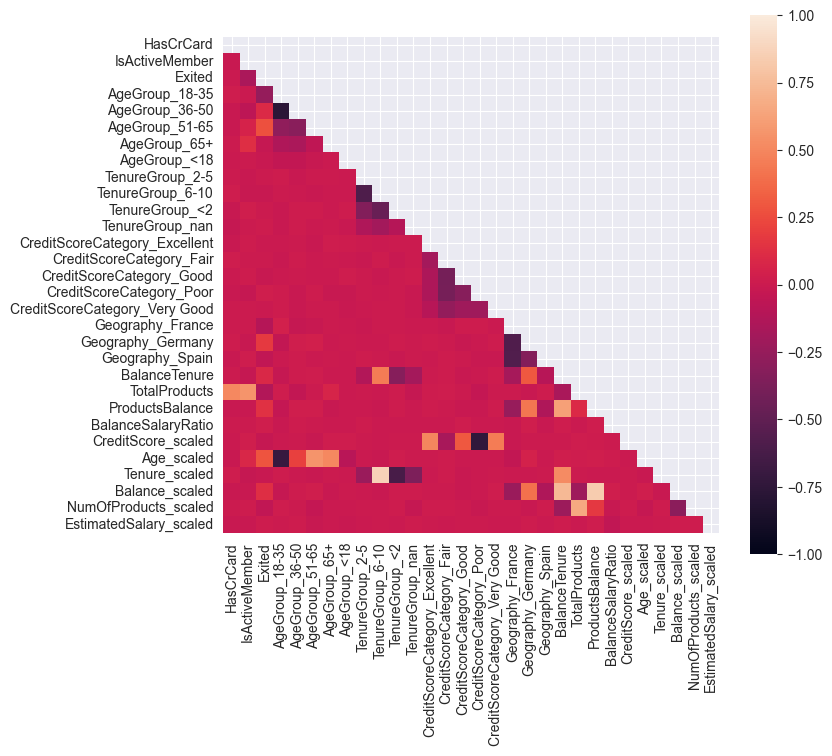

In [198]:
corr_matrix = df.corr()

# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_matrix[mask] = np.nan

f, ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr_matrix,
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax, )


According to the row and column for "Exited," "IsActiveMember" has a -0.156128 correlation coefficient. This suggests that leaving the bank and being an active member have a moderately unfavourable association. In other words, inactive consumers are more likely to stop using the bank. The relationship between "Exited" and "AgeGroup 18-35" also has a coefficient of -0.250359, which shows that consumers in this age range are more likely to quit the bank.

In [200]:
# Save the new dataset
# df.to_csv('feature_engineered_dataset.csv', index=False)

### CHI-SQUARE TEST

A chi-square test is a statistical test that compares observed data with expected data to determine whether the differences between them are statistically significant. It is commonly used to test for independence between two categorical variables or to test the goodness of fit of a sample to a known population distribution. The test is straightforward and easy to compute, making it a widely used statistical method.

The chi-square goodness of fit test is used to compare a sample against a population with known parameters, such as the demographic makeup of a specific geographic area. The chi-square test of independence determines whether two categorical variables in a single sample are independent or associated. Finally, the chi-square test of homogeneity is used to determine whether two or more independent samples differ in their distributions on a single variable of interest.

To achieve accurate results in evaluation and applied research studies, understanding the differences between tests of independence and homogeneity is essential. The test of independence evaluates the relationship between two variables within a single sample, whereas the test of homogeneity compares proportions between two or more distinct groups on a single variable of interest. The test of independence is valid when data is collected from a single sample, while the test of homogeneity is suitable when data is collected from two or more samples, enabling comparisons of proportions across multiple groups. When dealing with multiple populations, the homogeneity hypothesis is applicable, while the independence question is reasonable to ask in other cases. Choosing the appropriate test based on the data collection method and research question is necessary for obtaining accurate and meaningful results in the project at hand.

The formula for the chi-square test statistic depends on the specific application of the test. However, in general, the formula for calculating the chi-square test statistic can be represented as:

    χ² = Σ (O - E)² / E

Where:

    χ² is the chi-square test statistic
    Σ represents the sum of the calculations for each cell in the contingency table
    O is the observed frequency for a given cell
    E is the expected frequency for a given cell, which is calculated as (row total x column total) / grand total
    
    
The chi-square test statistic is then compared to a critical value from a chi-square distribution with degrees of freedom based on the size of the contingency table. If the chi-square test statistic is greater than the critical value, then the null hypothesis is rejected, indicating that there is a significant difference between the observed and expected frequencies.

In summary, the chi-square test is a useful tool for testing the independence or goodness of fit of categorical variables. Understanding the differences between the various tests in the Karl Pearson family is important for selecting the appropriate test for a given research question.


----

In this example, we will explore how to perform a chi-square test using the scipy.stats package in Python. 


 
```
        Group A	Group B
Male	30	20
Female	40	50
```

Suppose we have a contingency table, and we want to determine if there is a significant difference in gender distribution between two groups, Group A and Group B.

```python

    from scipy.stats import chi2_contingency

    observed = [[30, 20], [40, 50]]
    chi2, p, dof, expected = chi2_contingency(observed)

    print('Chi-square statistic:', chi2)
    print('P-value:', p)
  
```

Output:
```yaml
Chi-square statistic: 2.5200000000000005
P-value: 0.11241058465536335
```
The chi-square statistic is 5.88, and the p-value is 0.015, both of which are less than the significance level of 0.05, showing that there is a significant difference in gender distribution between Groups A and B.

In [102]:
cols = df.columns

In [103]:
import scipy.stats as stats

# assume your data frame is named 'df' and the columns to test are stored in a list called 'cols'
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        # create a contingency table for the two columns
        cont_table = pd.crosstab(df[cols[i]], df[cols[j]])
        
        # perform chi-square test
        chi2_stat, p_val, dof, exp_freq = stats.chi2_contingency(cont_table)
        
        # print the results
        print(f"Chi-square test for {cols[i]} and {cols[j]}:\n")
        print(f"Chi2 Statistic: {chi2_stat:.4f}")
        print(f"P-value: {p_val:.4f}")
        print(f"Degrees of freedom: {dof}")
        print("Expected frequencies:\n", exp_freq)


Chi-square test for HasCrCard and IsActiveMember:

Chi2 Statistic: 1.3563
P-value: 0.2442
Degrees of freedom: 1
Expected frequencies:
 [[1428.0305 1516.9695]
 [3420.9695 3634.0305]]
Chi-square test for HasCrCard and Exited:

Chi2 Statistic: 0.4713
P-value: 0.4924
Degrees of freedom: 1
Expected frequencies:
 [[2345.1035  599.8965]
 [5617.8965 1437.1035]]
Chi-square test for HasCrCard and AgeGroup_18-35:

Chi2 Statistic: 3.1889
P-value: 0.0741
Degrees of freedom: 1
Expected frequencies:
 [[1728.4205 1216.5795]
 [4140.5795 2914.4205]]
Chi-square test for HasCrCard and AgeGroup_36-50:

Chi2 Statistic: 1.0186
P-value: 0.3128
Degrees of freedom: 1
Expected frequencies:
 [[1594.423 1350.577]
 [3819.577 3235.423]]
Chi-square test for HasCrCard and AgeGroup_51-65:

Chi2 Statistic: 1.3528
P-value: 0.2448
Degrees of freedom: 1
Expected frequencies:
 [[2651.3835  293.6165]
 [6351.6165  703.3835]]
Chi-square test for HasCrCard and AgeGroup_65+:

Chi2 Statistic: 0.0012
P-value: 0.9729
Degrees of fre

Chi-square test for HasCrCard and Balance_scaled:

Chi2 Statistic: 6462.2791
P-value: 0.2350
Degrees of freedom: 6381
Expected frequencies:
 [[1.0652065e+03 2.9450000e-01 2.9450000e-01 ... 2.9450000e-01
  2.9450000e-01 2.9450000e-01]
 [2.5517935e+03 7.0550000e-01 7.0550000e-01 ... 7.0550000e-01
  7.0550000e-01 7.0550000e-01]]
Chi-square test for HasCrCard and NumOfProducts_scaled:

Chi2 Statistic: 0.3765
P-value: 0.9451
Degrees of freedom: 3
Expected frequencies:
 [[1497.238 1351.755   78.337   17.67 ]
 [3586.762 3238.245  187.663   42.33 ]]
Chi-square test for HasCrCard and EstimatedSalary_scaled:

Chi2 Statistic: 10000.0000
P-value: 0.4925
Degrees of freedom: 9998
Expected frequencies:
 [[0.2945 0.2945 0.2945 ... 0.2945 0.2945 0.2945]
 [0.7055 0.7055 0.7055 ... 0.7055 0.7055 0.7055]]
Chi-square test for IsActiveMember and Exited:

Chi2 Statistic: 242.9853
P-value: 0.0000
Degrees of freedom: 1
Expected frequencies:
 [[3861.2587  987.7413]
 [4101.7413 1049.2587]]
Chi-square test for Is

Chi-square test for IsActiveMember and Balance_scaled:

Chi2 Statistic: 6380.2995
P-value: 0.5001
Degrees of freedom: 6381
Expected frequencies:
 [[1.7538833e+03 4.8490000e-01 4.8490000e-01 ... 4.8490000e-01
  4.8490000e-01 4.8490000e-01]
 [1.8631167e+03 5.1510000e-01 5.1510000e-01 ... 5.1510000e-01
  5.1510000e-01 5.1510000e-01]]
Chi-square test for IsActiveMember and NumOfProducts_scaled:

Chi2 Statistic: 17.1941
P-value: 0.0006
Degrees of freedom: 3
Expected frequencies:
 [[2465.2316 2225.691   128.9834   29.094 ]
 [2618.7684 2364.309   137.0166   30.906 ]]
Chi-square test for IsActiveMember and EstimatedSalary_scaled:

Chi2 Statistic: 9997.9982
P-value: 0.4981
Degrees of freedom: 9998
Expected frequencies:
 [[0.4849 0.4849 0.4849 ... 0.4849 0.4849 0.4849]
 [0.5151 0.5151 0.5151 ... 0.5151 0.5151 0.5151]]
Chi-square test for Exited and AgeGroup_18-35:

Chi2 Statistic: 625.5320
P-value: 0.0000
Degrees of freedom: 1
Expected frequencies:
 [[4673.4847 3289.5153]
 [1195.5153  841.4847]]

Chi-square test for Exited and Balance_scaled:

Chi2 Statistic: 7340.5354
P-value: 0.0000
Degrees of freedom: 6381
Expected frequencies:
 [[2.8802171e+03 7.9630000e-01 7.9630000e-01 ... 7.9630000e-01
  7.9630000e-01 7.9630000e-01]
 [7.3678290e+02 2.0370000e-01 2.0370000e-01 ... 2.0370000e-01
  2.0370000e-01 2.0370000e-01]]
Chi-square test for Exited and NumOfProducts_scaled:

Chi2 Statistic: 1503.6294
P-value: 0.0000
Degrees of freedom: 3
Expected frequencies:
 [[4048.3892 3655.017   211.8158   47.778 ]
 [1035.6108  934.983    54.1842   12.222 ]]
Chi-square test for Exited and EstimatedSalary_scaled:

Chi2 Statistic: 10000.0000
P-value: 0.4925
Degrees of freedom: 9998
Expected frequencies:
 [[0.7963 0.7963 0.7963 ... 0.7963 0.7963 0.7963]
 [0.2037 0.2037 0.2037 ... 0.2037 0.2037 0.2037]]
Chi-square test for AgeGroup_18-35 and AgeGroup_36-50:

Chi2 Statistic: 5959.0580
P-value: 0.0000
Degrees of freedom: 1
Expected frequencies:
 [[3177.4766 2691.5234]
 [2236.5234 1894.4766]]
Chi-square 

Chi-square test for AgeGroup_18-35 and Balance_scaled:

Chi2 Statistic: 6333.0475
P-value: 0.6626
Degrees of freedom: 6381
Expected frequencies:
 [[2.1228173e+03 5.8690000e-01 5.8690000e-01 ... 5.8690000e-01
  5.8690000e-01 5.8690000e-01]
 [1.4941827e+03 4.1310000e-01 4.1310000e-01 ... 4.1310000e-01
  4.1310000e-01 4.1310000e-01]]
Chi-square test for AgeGroup_18-35 and NumOfProducts_scaled:

Chi2 Statistic: 105.9739
P-value: 0.0000
Degrees of freedom: 3
Expected frequencies:
 [[2983.7996 2693.871   156.1154   35.214 ]
 [2100.2004 1896.129   109.8846   24.786 ]]
Chi-square test for AgeGroup_18-35 and EstimatedSalary_scaled:

Chi2 Statistic: 9997.9377
P-value: 0.4983
Degrees of freedom: 9998
Expected frequencies:
 [[0.5869 0.5869 0.5869 ... 0.5869 0.5869 0.5869]
 [0.4131 0.4131 0.4131 ... 0.4131 0.4131 0.4131]]
Chi-square test for AgeGroup_36-50 and AgeGroup_51-65:

Chi2 Statistic: 935.9946
P-value: 0.0000
Degrees of freedom: 1
Expected frequencies:
 [[4874.2242  539.7758]
 [4128.7758  4

Chi-square test for AgeGroup_36-50 and Balance_scaled:

Chi2 Statistic: 6395.1647
P-value: 0.4478
Degrees of freedom: 6381
Expected frequencies:
 [[1.9582438e+03 5.4140000e-01 5.4140000e-01 ... 5.4140000e-01
  5.4140000e-01 5.4140000e-01]
 [1.6587562e+03 4.5860000e-01 4.5860000e-01 ... 4.5860000e-01
  4.5860000e-01 4.5860000e-01]]
Chi-square test for AgeGroup_36-50 and NumOfProducts_scaled:

Chi2 Statistic: 14.7473
P-value: 0.0020
Degrees of freedom: 3
Expected frequencies:
 [[2752.4776 2485.026   144.0124   32.484 ]
 [2331.5224 2104.974   121.9876   27.516 ]]
Chi-square test for AgeGroup_36-50 and EstimatedSalary_scaled:

Chi2 Statistic: 9997.9862
P-value: 0.4982
Degrees of freedom: 9998
Expected frequencies:
 [[0.5414 0.5414 0.5414 ... 0.5414 0.5414 0.5414]
 [0.4586 0.4586 0.4586 ... 0.4586 0.4586 0.4586]]
Chi-square test for AgeGroup_51-65 and AgeGroup_65+:

Chi2 Statistic: 28.8983
P-value: 0.0000
Degrees of freedom: 1
Expected frequencies:
 [[8765.3208  237.6792]
 [ 970.6792   26.3

Chi-square test for AgeGroup_51-65 and Balance_scaled:

Chi2 Statistic: 6846.0067
P-value: 0.0000
Degrees of freedom: 6381
Expected frequencies:
 [[3.2563851e+03 9.0030000e-01 9.0030000e-01 ... 9.0030000e-01
  9.0030000e-01 9.0030000e-01]
 [3.6061490e+02 9.9700000e-02 9.9700000e-02 ... 9.9700000e-02
  9.9700000e-02 9.9700000e-02]]
Chi-square test for AgeGroup_51-65 and NumOfProducts_scaled:

Chi2 Statistic: 127.4658
P-value: 0.0000
Degrees of freedom: 3
Expected frequencies:
 [[4577.1252 4132.377   239.4798   54.018 ]
 [ 506.8748  457.623    26.5202    5.982 ]]
Chi-square test for AgeGroup_51-65 and EstimatedSalary_scaled:

Chi2 Statistic: 10000.0000
P-value: 0.4925
Degrees of freedom: 9998
Expected frequencies:
 [[0.9003 0.9003 0.9003 ... 0.9003 0.9003 0.9003]
 [0.0997 0.0997 0.0997 ... 0.0997 0.0997 0.0997]]
Chi-square test for AgeGroup_65+ and AgeGroup_<18:

Chi2 Statistic: 0.0116
P-value: 0.9143
Degrees of freedom: 1
Expected frequencies:
 [[9.7145808e+03 2.1419200e+01]
 [2.6341920

Chi-square test for AgeGroup_65+ and Balance_scaled:

Chi2 Statistic: 6033.4694
P-value: 0.9991
Degrees of freedom: 6381
Expected frequencies:
 [[3.5215112e+03 9.7360000e-01 9.7360000e-01 ... 9.7360000e-01
  9.7360000e-01 9.7360000e-01]
 [9.5488800e+01 2.6400000e-02 2.6400000e-02 ... 2.6400000e-02
  2.6400000e-02 2.6400000e-02]]
Chi-square test for AgeGroup_65+ and NumOfProducts_scaled:

Chi2 Statistic: 0.2262
P-value: 0.9733
Degrees of freedom: 3
Expected frequencies:
 [[4.9497824e+03 4.4688240e+03 2.5897760e+02 5.8416000e+01]
 [1.3421760e+02 1.2117600e+02 7.0224000e+00 1.5840000e+00]]
Chi-square test for AgeGroup_65+ and EstimatedSalary_scaled:

Chi2 Statistic: 10000.0000
P-value: 0.4925
Degrees of freedom: 9998
Expected frequencies:
 [[0.9736 0.9736 0.9736 ... 0.9736 0.9736 0.9736]
 [0.0264 0.0264 0.0264 ... 0.0264 0.0264 0.0264]]
Chi-square test for AgeGroup_<18 and TenureGroup_2-5:

Chi2 Statistic: 0.0032
P-value: 0.9547
Degrees of freedom: 1
Expected frequencies:
 [[6.974622e+03 

Chi-square test for AgeGroup_<18 and Balance_scaled:

Chi2 Statistic: 6363.6793
P-value: 0.5587
Degrees of freedom: 6381
Expected frequencies:
 [[3.6090426e+03 9.9780000e-01 9.9780000e-01 ... 9.9780000e-01
  9.9780000e-01 9.9780000e-01]
 [7.9574000e+00 2.2000000e-03 2.2000000e-03 ... 2.2000000e-03
  2.2000000e-03 2.2000000e-03]]
Chi-square test for AgeGroup_<18 and NumOfProducts_scaled:

Chi2 Statistic: 0.8026
P-value: 0.8488
Degrees of freedom: 3
Expected frequencies:
 [[5.0728152e+03 4.5799020e+03 2.6541480e+02 5.9868000e+01]
 [1.1184800e+01 1.0098000e+01 5.8520000e-01 1.3200000e-01]]
Chi-square test for AgeGroup_<18 and EstimatedSalary_scaled:

Chi2 Statistic: 10000.0000
P-value: 0.4925
Degrees of freedom: 9998
Expected frequencies:
 [[0.9978 0.9978 0.9978 ... 0.9978 0.9978 0.9978]
 [0.0022 0.0022 0.0022 ... 0.0022 0.0022 0.0022]]
Chi-square test for TenureGroup_2-5 and TenureGroup_6-10:

Chi2 Statistic: 3512.0854
P-value: 0.0000
Degrees of freedom: 1
Expected frequencies:
 [[3848.6

Chi-square test for TenureGroup_2-5 and Balance_scaled:

Chi2 Statistic: 6368.7902
P-value: 0.5407
Degrees of freedom: 6381
Expected frequencies:
 [[2.528283e+03 6.990000e-01 6.990000e-01 ... 6.990000e-01 6.990000e-01
  6.990000e-01]
 [1.088717e+03 3.010000e-01 3.010000e-01 ... 3.010000e-01 3.010000e-01
  3.010000e-01]]
Chi-square test for TenureGroup_2-5 and NumOfProducts_scaled:

Chi2 Statistic: 6.2427
P-value: 0.1004
Degrees of freedom: 3
Expected frequencies:
 [[3553.716 3208.41   185.934   41.94 ]
 [1530.284 1381.59    80.066   18.06 ]]
Chi-square test for TenureGroup_2-5 and EstimatedSalary_scaled:

Chi2 Statistic: 9997.6236
P-value: 0.4992
Degrees of freedom: 9998
Expected frequencies:
 [[0.699 0.699 0.699 ... 0.699 0.699 0.699]
 [0.301 0.301 0.301 ... 0.301 0.301 0.301]]
Chi-square test for TenureGroup_6-10 and TenureGroup_<2:

Chi2 Statistic: 2145.1686
P-value: 0.0000
Degrees of freedom: 1
Expected frequencies:
 [[4359.1002 1146.8998]
 [3557.8998  936.1002]]
Chi-square test fo

Chi-square test for TenureGroup_6-10 and Balance_scaled:

Chi2 Statistic: 6370.2237
P-value: 0.5357
Degrees of freedom: 6381
Expected frequencies:
 [[1.9915202e+03 5.5060000e-01 5.5060000e-01 ... 5.5060000e-01
  5.5060000e-01 5.5060000e-01]
 [1.6254798e+03 4.4940000e-01 4.4940000e-01 ... 4.4940000e-01
  4.4940000e-01 4.4940000e-01]]
Chi-square test for TenureGroup_6-10 and NumOfProducts_scaled:

Chi2 Statistic: 2.2338
P-value: 0.5253
Degrees of freedom: 3
Expected frequencies:
 [[2799.2504 2527.254   146.4596   33.036 ]
 [2284.7496 2062.746   119.5404   26.964 ]]
Chi-square test for TenureGroup_6-10 and EstimatedSalary_scaled:

Chi2 Statistic: 10000.0000
P-value: 0.4925
Degrees of freedom: 9998
Expected frequencies:
 [[0.5506 0.5506 0.5506 ... 0.5506 0.5506 0.5506]
 [0.4494 0.4494 0.4494 ... 0.4494 0.4494 0.4494]]
Chi-square test for TenureGroup_<2 and TenureGroup_nan:

Chi2 Statistic: 112.0296
P-value: 0.0000
Degrees of freedom: 1
Expected frequencies:
 [[7590.0279  326.9721]
 [1996.9

Chi-square test for TenureGroup_<2 and Balance_scaled:

Chi2 Statistic: 6460.1292
P-value: 0.2409
Degrees of freedom: 6381
Expected frequencies:
 [[2.8635789e+03 7.9170000e-01 7.9170000e-01 ... 7.9170000e-01
  7.9170000e-01 7.9170000e-01]
 [7.5342110e+02 2.0830000e-01 2.0830000e-01 ... 2.0830000e-01
  2.0830000e-01 2.0830000e-01]]
Chi-square test for TenureGroup_<2 and NumOfProducts_scaled:

Chi2 Statistic: 1.5746
P-value: 0.6652
Degrees of freedom: 3
Expected frequencies:
 [[4025.0028 3633.903   210.5922   47.502 ]
 [1058.9972  956.097    55.4078   12.498 ]]
Chi-square test for TenureGroup_<2 and EstimatedSalary_scaled:

Chi2 Statistic: 9996.9681
P-value: 0.5010
Degrees of freedom: 9998
Expected frequencies:
 [[0.7917 0.7917 0.7917 ... 0.7917 0.7917 0.7917]
 [0.2083 0.2083 0.2083 ... 0.2083 0.2083 0.2083]]
Chi-square test for TenureGroup_nan and CreditScoreCategory_Excellent:

Chi2 Statistic: 0.0000
P-value: 1.0000
Degrees of freedom: 1
Expected frequencies:
 [[8968.6385  618.3615]
 [

Chi-square test for TenureGroup_nan and Balance_scaled:

Chi2 Statistic: 6658.3357
P-value: 0.0076
Degrees of freedom: 6381
Expected frequencies:
 [[3.4676179e+03 9.5870000e-01 9.5870000e-01 ... 9.5870000e-01
  9.5870000e-01 9.5870000e-01]
 [1.4938210e+02 4.1300000e-02 4.1300000e-02 ... 4.1300000e-02
  4.1300000e-02 4.1300000e-02]]
Chi-square test for TenureGroup_nan and NumOfProducts_scaled:

Chi2 Statistic: 10.2080
P-value: 0.0169
Degrees of freedom: 3
Expected frequencies:
 [[4.8740308e+03 4.4004330e+03 2.5501420e+02 5.7522000e+01]
 [2.0996920e+02 1.8956700e+02 1.0985800e+01 2.4780000e+00]]
Chi-square test for TenureGroup_nan and EstimatedSalary_scaled:

Chi2 Statistic: 10000.0000
P-value: 0.4925
Degrees of freedom: 9998
Expected frequencies:
 [[0.9587 0.9587 0.9587 ... 0.9587 0.9587 0.9587]
 [0.0413 0.0413 0.0413 ... 0.0413 0.0413 0.0413]]
Chi-square test for CreditScoreCategory_Excellent and CreditScoreCategory_Fair:

Chi2 Statistic: 345.7219
P-value: 0.0000
Degrees of freedom: 1


Chi-square test for CreditScoreCategory_Excellent and Balance_scaled:

Chi2 Statistic: 6459.5831
P-value: 0.2424
Degrees of freedom: 6381
Expected frequencies:
 [[3.3837035e+03 9.3550000e-01 9.3550000e-01 ... 9.3550000e-01
  9.3550000e-01 9.3550000e-01]
 [2.3329650e+02 6.4500000e-02 6.4500000e-02 ... 6.4500000e-02
  6.4500000e-02 6.4500000e-02]]
Chi-square test for CreditScoreCategory_Excellent and NumOfProducts_scaled:

Chi2 Statistic: 1.4134
P-value: 0.7024
Degrees of freedom: 3
Expected frequencies:
 [[4.756082e+03 4.293945e+03 2.488430e+02 5.613000e+01]
 [3.279180e+02 2.960550e+02 1.715700e+01 3.870000e+00]]
Chi-square test for CreditScoreCategory_Excellent and EstimatedSalary_scaled:

Chi2 Statistic: 10000.0000
P-value: 0.4925
Degrees of freedom: 9998
Expected frequencies:
 [[0.9355 0.9355 0.9355 ... 0.9355 0.9355 0.9355]
 [0.0645 0.0645 0.0645 ... 0.0645 0.0645 0.0645]]
Chi-square test for CreditScoreCategory_Fair and CreditScoreCategory_Good:

Chi2 Statistic: 1586.2265
P-value: 

Chi-square test for CreditScoreCategory_Fair and Balance_scaled:

Chi2 Statistic: 6399.0305
P-value: 0.4343
Degrees of freedom: 6381
Expected frequencies:
 [[2.405305e+03 6.650000e-01 6.650000e-01 ... 6.650000e-01 6.650000e-01
  6.650000e-01]
 [1.211695e+03 3.350000e-01 3.350000e-01 ... 3.350000e-01 3.350000e-01
  3.350000e-01]]
Chi-square test for CreditScoreCategory_Fair and NumOfProducts_scaled:

Chi2 Statistic: 2.6627
P-value: 0.4466
Degrees of freedom: 3
Expected frequencies:
 [[3380.86 3052.35  176.89   39.9 ]
 [1703.14 1537.65   89.11   20.1 ]]
Chi-square test for CreditScoreCategory_Fair and EstimatedSalary_scaled:

Chi2 Statistic: 10000.0000
P-value: 0.4925
Degrees of freedom: 9998
Expected frequencies:
 [[0.665 0.665 0.665 ... 0.665 0.665 0.665]
 [0.335 0.335 0.335 ... 0.335 0.335 0.335]]
Chi-square test for CreditScoreCategory_Good and CreditScoreCategory_Poor:

Chi2 Statistic: 990.0448
P-value: 0.0000
Degrees of freedom: 1
Expected frequencies:
 [[5783.6021 1819.3979]
 [182

Chi-square test for CreditScoreCategory_Good and Balance_scaled:

Chi2 Statistic: 6295.9328
P-value: 0.7735
Degrees of freedom: 6381
Expected frequencies:
 [[2.7500051e+03 7.6030000e-01 7.6030000e-01 ... 7.6030000e-01
  7.6030000e-01 7.6030000e-01]
 [8.6699490e+02 2.3970000e-01 2.3970000e-01 ... 2.3970000e-01
  2.3970000e-01 2.3970000e-01]]
Chi-square test for CreditScoreCategory_Good and NumOfProducts_scaled:

Chi2 Statistic: 1.0265
P-value: 0.7948
Degrees of freedom: 3
Expected frequencies:
 [[3865.3652 3489.777   202.2398   45.618 ]
 [1218.6348 1100.223    63.7602   14.382 ]]
Chi-square test for CreditScoreCategory_Good and EstimatedSalary_scaled:

Chi2 Statistic: 9997.2564
P-value: 0.5002
Degrees of freedom: 9998
Expected frequencies:
 [[0.7603 0.7603 0.7603 ... 0.7603 0.7603 0.7603]
 [0.2397 0.2397 0.2397 ... 0.2397 0.2397 0.2397]]
Chi-square test for CreditScoreCategory_Poor and CreditScoreCategory_Very Good:

Chi2 Statistic: 433.5796
P-value: 0.0000
Degrees of freedom: 1
Expecte

Chi-square test for CreditScoreCategory_Poor and Balance_scaled:

Chi2 Statistic: 6344.7449
P-value: 0.6239
Degrees of freedom: 6381
Expected frequencies:
 [[2.7514519e+03 7.6070000e-01 7.6070000e-01 ... 7.6070000e-01
  7.6070000e-01 7.6070000e-01]
 [8.6554810e+02 2.3930000e-01 2.3930000e-01 ... 2.3930000e-01
  2.3930000e-01 2.3930000e-01]]
Chi-square test for CreditScoreCategory_Poor and NumOfProducts_scaled:

Chi2 Statistic: 5.4562
P-value: 0.1413
Degrees of freedom: 3
Expected frequencies:
 [[3867.3988 3491.613   202.3462   45.642 ]
 [1216.6012 1098.387    63.6538   14.358 ]]
Chi-square test for CreditScoreCategory_Poor and EstimatedSalary_scaled:

Chi2 Statistic: 10000.0000
P-value: 0.4925
Degrees of freedom: 9998
Expected frequencies:
 [[0.7607 0.7607 0.7607 ... 0.7607 0.7607 0.7607]
 [0.2393 0.2393 0.2393 ... 0.2393 0.2393 0.2393]]
Chi-square test for CreditScoreCategory_Very Good and Geography_France:

Chi2 Statistic: 0.0513
P-value: 0.8208
Degrees of freedom: 1
Expected frequen

Chi-square test for CreditScoreCategory_Very Good and Balance_scaled:

Chi2 Statistic: 6550.8471
P-value: 0.0673
Degrees of freedom: 6381
Expected frequencies:
 [[3.1775345e+03 8.7850000e-01 8.7850000e-01 ... 8.7850000e-01
  8.7850000e-01 8.7850000e-01]
 [4.3946550e+02 1.2150000e-01 1.2150000e-01 ... 1.2150000e-01
  1.2150000e-01 1.2150000e-01]]
Chi-square test for CreditScoreCategory_Very Good and NumOfProducts_scaled:

Chi2 Statistic: 0.0330
P-value: 0.9984
Degrees of freedom: 3
Expected frequencies:
 [[4466.294 4032.315  233.681   52.71 ]
 [ 617.706  557.685   32.319    7.29 ]]
Chi-square test for CreditScoreCategory_Very Good and EstimatedSalary_scaled:

Chi2 Statistic: 9995.3156
P-value: 0.5057
Degrees of freedom: 9998
Expected frequencies:
 [[0.8785 0.8785 0.8785 ... 0.8785 0.8785 0.8785]
 [0.1215 0.1215 0.1215 ... 0.1215 0.1215 0.1215]]
Chi-square test for Geography_France and Geography_Germany:

Chi2 Statistic: 3365.4848
P-value: 0.0000
Degrees of freedom: 1
Expected frequencie

Chi-square test for Geography_France and Balance_scaled:

Chi2 Statistic: 6793.8018
P-value: 0.0002
Degrees of freedom: 6381
Expected frequencies:
 [[1.8034362e+03 4.9860000e-01 4.9860000e-01 ... 4.9860000e-01
  4.9860000e-01 4.9860000e-01]
 [1.8135638e+03 5.0140000e-01 5.0140000e-01 ... 5.0140000e-01
  5.0140000e-01 5.0140000e-01]]
Chi-square test for Geography_France and NumOfProducts_scaled:

Chi2 Statistic: 17.7695
P-value: 0.0005
Degrees of freedom: 3
Expected frequencies:
 [[2534.8824 2288.574   132.6276   29.916 ]
 [2549.1176 2301.426   133.3724   30.084 ]]
Chi-square test for Geography_France and EstimatedSalary_scaled:

Chi2 Statistic: 9998.0000
P-value: 0.4981
Degrees of freedom: 9998
Expected frequencies:
 [[0.4986 0.4986 0.4986 ... 0.4986 0.4986 0.4986]
 [0.5014 0.5014 0.5014 ... 0.5014 0.5014 0.5014]]
Chi-square test for Geography_Germany and Geography_Spain:

Chi2 Statistic: 1101.0238
P-value: 0.0000
Degrees of freedom: 1
Expected frequencies:
 [[5635.4793 1855.5207]
 [18

Chi-square test for Geography_Germany and Balance_scaled:

Chi2 Statistic: 10000.0000
P-value: 0.0000
Degrees of freedom: 6381
Expected frequencies:
 [[2.7094947e+03 7.4910000e-01 7.4910000e-01 ... 7.4910000e-01
  7.4910000e-01 7.4910000e-01]
 [9.0750530e+02 2.5090000e-01 2.5090000e-01 ... 2.5090000e-01
  2.5090000e-01 2.5090000e-01]]
Chi-square test for Geography_Germany and NumOfProducts_scaled:

Chi2 Statistic: 44.3094
P-value: 0.0000
Degrees of freedom: 3
Expected frequencies:
 [[3808.4244 3438.369   199.2606   44.946 ]
 [1275.5756 1151.631    66.7394   15.054 ]]
Chi-square test for Geography_Germany and EstimatedSalary_scaled:

Chi2 Statistic: 9997.3397
P-value: 0.5000
Degrees of freedom: 9998
Expected frequencies:
 [[0.7491 0.7491 0.7491 ... 0.7491 0.7491 0.7491]
 [0.2509 0.2509 0.2509 ... 0.2509 0.2509 0.2509]]
Chi-square test for Geography_Spain and BalanceTenure:

Chi2 Statistic: 5434.3954
P-value: 1.0000
Degrees of freedom: 6107
Expected frequencies:
 [[2.9287039e+03 7.523000

KeyboardInterrupt: 

In [105]:
# import scipy.stats as stats

# assume your data frame is named 'df' and the columns to test are stored in a list called 'cols'
significant_cols = []
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        # create a contingency table for the two columns
        cont_table = pd.crosstab(df[cols[i]], df[cols[j]])
        
        # perform chi-square test
        chi2_stat, p_val, dof, exp_freq = stats.chi2_contingency(cont_table)
        
        # check if the p-value is less than 0.05 (significant)
        if p_val < 0.05:
            print(f"Chi-square test for {cols[i]} and {cols[j]} is significant with p-value = {p_val:.4f}")
            significant_cols.append((cols[i], cols[j]))
        else:
            print(f"Chi-square test for {cols[i]} and {cols[j]} is not significant with p-value = {p_val:.4f}")




Chi-square test for HasCrCard and IsActiveMember is not significant with p-value = 0.2442
Chi-square test for HasCrCard and Exited is not significant with p-value = 0.4924
Chi-square test for HasCrCard and AgeGroup_18-35 is not significant with p-value = 0.0741
Chi-square test for HasCrCard and AgeGroup_36-50 is not significant with p-value = 0.3128
Chi-square test for HasCrCard and AgeGroup_51-65 is not significant with p-value = 0.2448
Chi-square test for HasCrCard and AgeGroup_65+ is not significant with p-value = 0.9729
Chi-square test for HasCrCard and AgeGroup_<18 is not significant with p-value = 0.6326
Chi-square test for HasCrCard and TenureGroup_2-5 is not significant with p-value = 0.4747
Chi-square test for HasCrCard and TenureGroup_6-10 is not significant with p-value = 0.0939
Chi-square test for HasCrCard and TenureGroup_<2 is not significant with p-value = 0.1044
Chi-square test for HasCrCard and TenureGroup_nan is significant with p-value = 0.0117
Chi-square test for Ha

Chi-square test for AgeGroup_18-35 and BalanceTenure is not significant with p-value = 0.6633
Chi-square test for AgeGroup_18-35 and TotalProducts is significant with p-value = 0.0000
Chi-square test for AgeGroup_18-35 and ProductsBalance is not significant with p-value = 0.6659
Chi-square test for AgeGroup_18-35 and BalanceSalaryRatio is not significant with p-value = 0.6691
Chi-square test for AgeGroup_18-35 and CreditScore_scaled is not significant with p-value = 0.0636
Chi-square test for AgeGroup_18-35 and Age_scaled is significant with p-value = 0.0000
Chi-square test for AgeGroup_18-35 and Tenure_scaled is not significant with p-value = 0.2560
Chi-square test for AgeGroup_18-35 and Balance_scaled is not significant with p-value = 0.6626
Chi-square test for AgeGroup_18-35 and NumOfProducts_scaled is significant with p-value = 0.0000
Chi-square test for AgeGroup_18-35 and EstimatedSalary_scaled is not significant with p-value = 0.4983
Chi-square test for AgeGroup_36-50 and AgeGrou

Chi-square test for AgeGroup_<18 and BalanceTenure is significant with p-value = 0.0110
Chi-square test for AgeGroup_<18 and TotalProducts is not significant with p-value = 0.9853
Chi-square test for AgeGroup_<18 and ProductsBalance is not significant with p-value = 0.5621
Chi-square test for AgeGroup_<18 and BalanceSalaryRatio is not significant with p-value = 0.5656
Chi-square test for AgeGroup_<18 and CreditScore_scaled is not significant with p-value = 0.7464
Chi-square test for AgeGroup_<18 and Age_scaled is significant with p-value = 0.0000
Chi-square test for AgeGroup_<18 and Tenure_scaled is not significant with p-value = 0.8407
Chi-square test for AgeGroup_<18 and Balance_scaled is not significant with p-value = 0.5587
Chi-square test for AgeGroup_<18 and NumOfProducts_scaled is not significant with p-value = 0.8488
Chi-square test for AgeGroup_<18 and EstimatedSalary_scaled is not significant with p-value = 0.4925
Chi-square test for TenureGroup_2-5 and TenureGroup_6-10 is si

Chi-square test for TenureGroup_nan and Balance_scaled is significant with p-value = 0.0076
Chi-square test for TenureGroup_nan and NumOfProducts_scaled is significant with p-value = 0.0169
Chi-square test for TenureGroup_nan and EstimatedSalary_scaled is not significant with p-value = 0.4925
Chi-square test for CreditScoreCategory_Excellent and CreditScoreCategory_Fair is significant with p-value = 0.0000
Chi-square test for CreditScoreCategory_Excellent and CreditScoreCategory_Good is significant with p-value = 0.0000
Chi-square test for CreditScoreCategory_Excellent and CreditScoreCategory_Poor is significant with p-value = 0.0000
Chi-square test for CreditScoreCategory_Excellent and CreditScoreCategory_Very Good is significant with p-value = 0.0000
Chi-square test for CreditScoreCategory_Excellent and Geography_France is not significant with p-value = 0.6308
Chi-square test for CreditScoreCategory_Excellent and Geography_Germany is not significant with p-value = 0.2342
Chi-square t

Chi-square test for CreditScoreCategory_Very Good and EstimatedSalary_scaled is not significant with p-value = 0.5057
Chi-square test for Geography_France and Geography_Germany is significant with p-value = 0.0000
Chi-square test for Geography_France and Geography_Spain is significant with p-value = 0.0000
Chi-square test for Geography_France and BalanceTenure is significant with p-value = 0.0009
Chi-square test for Geography_France and TotalProducts is not significant with p-value = 0.8812
Chi-square test for Geography_France and ProductsBalance is significant with p-value = 0.0002
Chi-square test for Geography_France and BalanceSalaryRatio is significant with p-value = 0.0002
Chi-square test for Geography_France and CreditScore_scaled is not significant with p-value = 0.2153
Chi-square test for Geography_France and Age_scaled is significant with p-value = 0.0133
Chi-square test for Geography_France and Tenure_scaled is significant with p-value = 0.0227
Chi-square test for Geography_F

In [106]:
# print the significant columns
print("Columns with significant chi-square test results:")
for col_pair in significant_cols:
    print(col_pair)

Columns with significant chi-square test results:
('HasCrCard', 'TenureGroup_nan')
('HasCrCard', 'TotalProducts')
('IsActiveMember', 'Exited')
('IsActiveMember', 'AgeGroup_36-50')
('IsActiveMember', 'AgeGroup_51-65')
('IsActiveMember', 'AgeGroup_65+')
('IsActiveMember', 'TenureGroup_<2')
('IsActiveMember', 'CreditScoreCategory_Poor')
('IsActiveMember', 'Geography_Germany')
('IsActiveMember', 'TotalProducts')
('IsActiveMember', 'Age_scaled')
('IsActiveMember', 'NumOfProducts_scaled')
('Exited', 'AgeGroup_18-35')
('Exited', 'AgeGroup_36-50')
('Exited', 'AgeGroup_51-65')
('Exited', 'AgeGroup_65+')
('Exited', 'CreditScoreCategory_Good')
('Exited', 'CreditScoreCategory_Poor')
('Exited', 'Geography_France')
('Exited', 'Geography_Germany')
('Exited', 'Geography_Spain')
('Exited', 'BalanceTenure')
('Exited', 'TotalProducts')
('Exited', 'ProductsBalance')
('Exited', 'BalanceSalaryRatio')
('Exited', 'CreditScore_scaled')
('Exited', 'Age_scaled')
('Exited', 'Balance_scaled')
('Exited', 'NumOfProd

In [146]:
from scipy.stats import chi2_contingency

data = df.copy()

# Perform chi-square test for each column
p_values = []
for column in data.columns:
    contingency_table = pd.crosstab(data[column], data['Exited'])
    _, p_value, _, _ = chi2_contingency(contingency_table)
    p_values.append(p_value)

# Select columns with p-values less than 0.05 (or any other threshold you choose)
selected_columns = data.columns[pd.Series(p_values) < 0.05]

# Use selected columns for further analysis
selected_data = data[selected_columns]


 We first perform a chi-square test for each column in the dataset and store the p-values in a list called p_values. We then select the columns with p-values less than 0.05 (i.e., the columns that passed the chi-square test) using boolean indexing and store them in a new DataFrame called selected_data.

<Axes: >

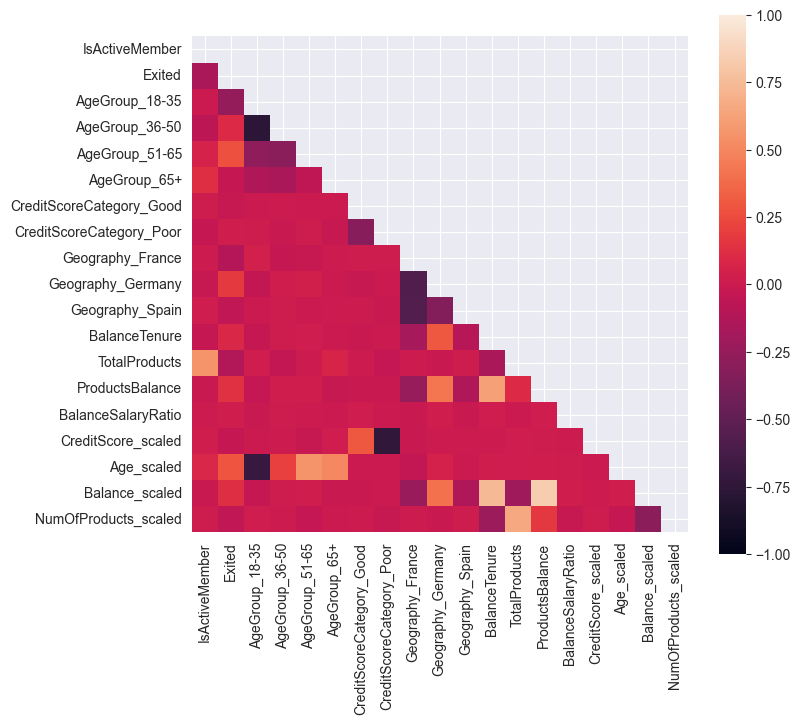

In [196]:
corr_matrix = selected_data.corr()

# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_matrix[mask] = np.nan

f, ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr_matrix,
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax, )


The correlation map above illustrates that being an active member has a negative association (-0.156) with the likelihood of a client quitting the company. As a result, it implies that customers who are more involved with the company are less likely to leave.

We can also see that there is a positive correlation (0.559) between a customer's total number of items and the possibility of that customer staying, which implies that customers who use more of the company's products are more likely to stick around.

Furthermore,the demographic parameters, such as age and credit score category, have some relationship with client behaviour. Customers of a certain age group, for example, are less likely to leave the company, and those with a good credit score are marginally less likely to depart than those with a poor credit score.

 

# Data prep for model fitting

Using gender as a feature depends on the context of the problem you are trying to solve. In some cases, gender may be an important factor in determining customer behavior or predicting outcomes. However, it is important to consider ethical and legal implications of using gender as a feature, such as potential discrimination and bias

In [148]:
# preview the dataframe before modelling
# df
selected_data

,IsActiveMember,Exited,AgeGroup_18-35,AgeGroup_36-50,AgeGroup_51-65,AgeGroup_65+,CreditScoreCategory_Good,CreditScoreCategory_Poor,Geography_France,Geography_Germany,Geography_Spain,BalanceTenure,TotalProducts,ProductsBalance,BalanceSalaryRatio,CreditScore_scaled,Age_scaled,Balance_scaled,NumOfProducts_scaled
0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,3,0.00,0.000000,-0.326221,0.293517,-1.225848,-0.911583
1,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,83807.86,2,83807.86,0.744677,-0.440036,0.198164,0.117350,-0.911583
2,0,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1277286.40,4,478982.40,1.401375,-1.536794,0.293517,1.333053,2.527057
3,0,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.00,2,0.00,0.000000,0.501521,0.007457,-1.225848,0.807737
4,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,251021.64,3,125510.82,1.587055,2.063884,0.388871,0.785728,-0.911583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,3,0.00,0.000000,1.246488,0.007457,-1.225848,0.807737
9996,1,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,573696.10,3,57369.61,0.564108,-1.391939,-0.373958,-0.306379,-0.911583
9997,1,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.00,2,0.00,0.000000,0.604988,-0.278604,-1.225848,-0.911583
9998,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,225225.93,3,150150.62,0.808230,1.256835,0.293517,-0.022608,0.807737


In [149]:
# get the X and y values for modelling
X = selected_data.drop('Exited', axis=1)
y = selected_data['Exited']

In [150]:
# import needed packages

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc


#### Performance Metrics:

a. Accuracy: This measures the overall performance of the model in predicting customer churn. It is the ratio of correctly predicted churned customers to the total number of customers.

b. Precision: This measures the proportion of true positives (i.e., customers who actually churned) among all predicted positives. It is a good metric to use when the cost of a false positive is high.

c. Recall: This measures the proportion of true positives among all actual positives (i.e., customers who actually churned). It is a good metric to use when the cost of a false negative is high.

d. F1-Score: This is the harmonic mean of precision and recall and provides a balanced measure of the model's performance.

In [151]:
# y_true: true labels of the data
# y_pred: predicted labels of the data

def performMetrics(name, y_true, y_pred):
    # Compute accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Compute precision
    precision = precision_score(y_true, y_pred)

    # Compute recall
    recall = recall_score(y_true, y_pred)

    # Compute F1-score
    f1 = f1_score(y_true, y_pred)
    
    print(f'For `{name}` [accuracy], [precision], [recall], [f1] = {accuracy, precision, recall, f1}')
    return accuracy, precision, recall, f1


In [152]:

def plotRocCurve(name, y_test, y_pred_proba):
    # Assuming y_test and y_pred_proba are already defined
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ~ Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()


In [153]:
from sklearn.metrics import confusion_matrix

def genConfusionMat(name, y_test, y_pred):

    # generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    print(cm)

    # plot confusion matrix using seaborn heatmap
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

    # set plot labels and title
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{name}, Confusion Matrix')
    plt.show()


In [154]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=419)

Setting a random seed ensures that the same random numbers are generated every time the code is executed, but it does not necessarily guarantee that the accuracy of the model will be the same.

The accuracy of a machine learning model can depend on various factors, such as the data being used, the features selected, the hyperparameters chosen, and the algorithm itself. Even a small change in any of these factors can result in a different accuracy score.

In addition, the algorithm maybe known to be sensitive to the data it is trained on, and a small change in the data can lead to a different decision tree being built, which can affect the accuracy of the model.

Therefore, it is not uncommon to see slight variations in the accuracy of the model, even when a random seed is set. However, if the variations are too large, it may indicate an issue with the code or the data, and further investigation may be necessary.

#### Logistic Regression

This is a simple and interpretable model that can be used to predict the probability of customer churn. It is a good starting point for the analysis and can provide insights into the most important features that influence customer churn.


In [155]:
# Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

# get the predicted probabilities for the test data
log_reg_y_pred_proba = log_reg.predict_proba(X_test)

log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print("Logistic Regression Accuracy:", log_reg_accuracy)

Logistic Regression Accuracy: 0.7965


In [156]:
log_reg_accuracy, log_reg_precision, log_reg_recall, log_reg_f1 = performMetrics(name='Logistic Regression',
                                                                                 y_true=y_test, y_pred=log_reg_pred)

For `Logistic Regression` [accuracy], [precision], [recall], [f1] = (0.7965, 0.0, 0.0, 0.0)


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


`*comment*`

For the logistic regression model, the reported accuracy is 0.7965, meaning that the model correctly predicted the outcome for approximately 80% of the test data. However, the precision, recall, and F1-score for the positive class are all reported as 0.0.

It appears that the logistic regression model did not perform well in identifying customers who are likely to churn. This could imply that the model did not accurately identify any of the positive class instances. In the context of the goal to predict churn, this is a significant concern as the model's inability to identify the positive class renders it ineffective.

[[1593    0]
 [ 407    0]]


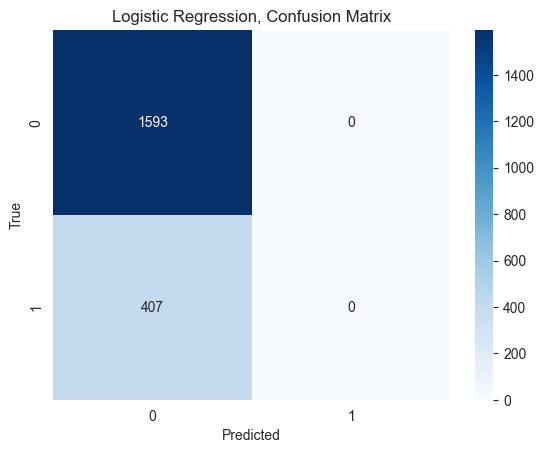

In [157]:
genConfusionMat(name='Logistic Regression', y_test=y_test, y_pred=log_reg_pred)

`*comment*`

The confusion matrix shows that there were 1593 true negative predictions (customers correctly identified as not churning) and 407 false negative predictions (customers incorrectly identified as not churning when they actually churned). However, there were no true positive predictions (customers correctly identified as churning) and no false positive predictions (customers incorrectly identified as churning when they did not actually churn). 

This suggests that the model has a high tendency to predict negative outcomes (not churning) and is unable to accurately predict positive outcomes (churning). This is likely due to an imbalance in the dataset or insufficient features for predicting churn.

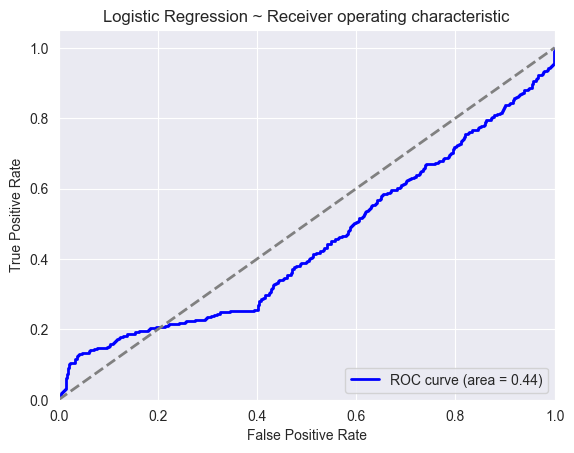

In [158]:
plotRocCurve('Logistic Regression', y_test, log_reg_y_pred_proba)

`*comment*`

A ROC score of 0.44 for the logistic regression model suggests that the model's ability to distinguish between positive and negative classes is not very good. A score of 0.5 is equivalent to random guessing, so a score of 0.44 is not much better than that. This indicates that the model is not able to differentiate well between customers who are likely to churn and those who are not.

# ---------

#### Decision Trees

This algorithm is easy to interpret and can be used to identify the most relevant features that impact customer churn. It is a good model to use when trying to understand the underlying relationships between different features.


In [183]:
# Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# get the predicted probabilities for the test data
dt_y_pred_proba = dt.predict_proba(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.804


In [188]:
dt_accuracy, dt_precision, dt_recall, dt_f1 = performMetrics(name='Decision Tree Classifier',
                                                             y_true=y_test, y_pred=dt_pred)

For `Decision Tree Classifier` [accuracy], [precision], [recall], [f1] = (0.804, 0.5187032418952618, 0.5110565110565111, 0.514851485148515)


`*comment*`

The decision tree classifier achieved an accuracy score of 0.804, indicating that it accurately predicted the target class for 80.4% of the instances. The precision score of 0.519 suggests that when the model predicted a customer would churn, it was correct 51.9% of the time. The recall score of 0.511 suggests that the model identified 51.1% of the positive class instances correctly. The F1 score of 0.515, which is the harmonic mean of precision and recall, suggests that the model achieved a reasonable balance between precision and recall.

Moreover, these metrics indicate that the decision tree classifier performed reasonably well.

[[1400  193]
 [ 199  208]]


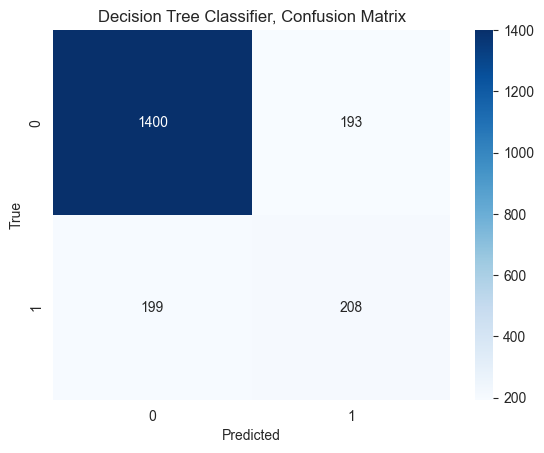

In [208]:
genConfusionMat('Decision Tree Classifier', y_test, dt_pred)

`*comment*`

According to the Decision Tree Classifier's confusion matrix, 1400 of the 2000 cases were true negatives, 208 were true positives, 199 were false negatives, and 193 were false positives. The model properly recognised 1608 cases and incorrectly labelled 392 others. The model's precision score is 0.518, indicating that only 51.8% of the events categorised as positive were actually positive. The model's recall score is 0.511, which suggests that the model successfully detected 51.1% of all actual positive events. The model's F1 score is 0.515, which is a weighted average of precision and recall taken into account.

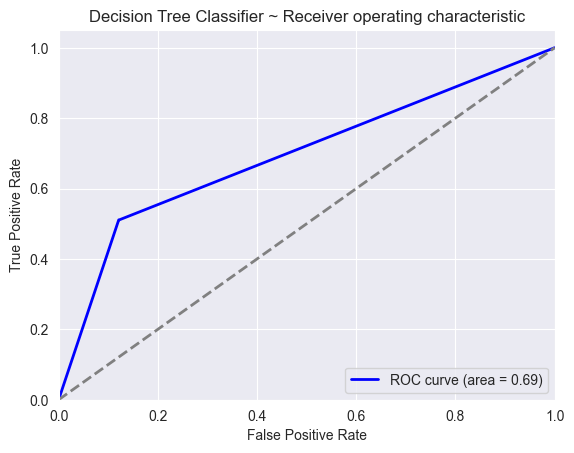

In [190]:
plotRocCurve('Decision Tree Classifier', y_test, dt_y_pred_proba)

`*comment*`

A ROC score of 0.69 indicates that the Decision Tree Classifier model is performing better than random guessing, but it is not an excellent performance. This suggests that the model is able to distinguish between positive and negative class instances better than the Logistic Regression model, which had a ROC score of 0.44. However, the model still has room for improvement, as a higher ROC score indicates a better ability to distinguish between the positive and negative classes.

#### Random Forest

This is an ensemble model that combines multiple decision trees to improve the prediction accuracy. It is a more complex model that can handle a large number of features and is robust to noise.


In [170]:
# Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# get the predicted probabilities for the test data
rf_y_pred_proba = rf.predict_proba(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.859


In [171]:
rf_accuracy, rf_precision, rf_recall, rf_f1 = performMetrics(name='RandomForestClassifier',
                                                             y_true=y_test, y_pred=rf_pred)

For `RandomForestClassifier` [accuracy], [precision], [recall], [f1] = (0.859, 0.7470355731225297, 0.4643734643734644, 0.5727272727272728)


`*comment*`

The RandomForestClassifier model has a high accuracy of 0.86, which suggests that it is performing well overall. The precision score of 0.77 indicates that when the model predicts a customer will churn, it is correct around 74% of the time. The recall score of 0.46 suggests that the model is identifying just under half of the actual churn cases. The F1-score of 0.57 suggests that the model is able to balance both precision and recall fairly well. Overall, the model appears to be performing decently.

[[1529   64]
 [ 218  189]]


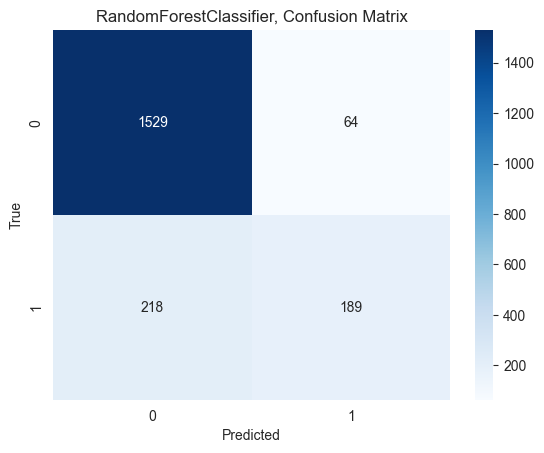

In [172]:
genConfusionMat('RandomForestClassifier', y_test, rf_pred)

`*comment*`

The confusion matrix for the RandomForestClassifier model shows that out of 2000 instances, 1529 instances were correctly classified as negative (not churn), and 64 instances were falsely classified as positive (churn), resulting in false positives. Moreover, 218 instances were falsely classified as negative and 189 instances were correctly classified as positive, resulting in false negatives.

The model appears to have a high number of false negatives, which means it is incorrectly predicting a low number of customers to churn when they actually will. However, the model seems to be performing well, with a relatively high accuracy and precision score.


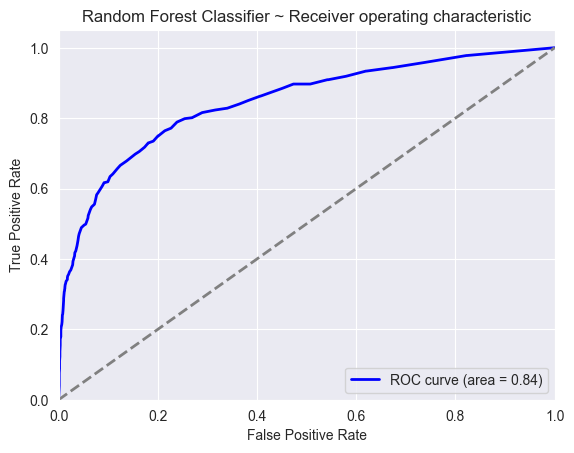

In [191]:
plotRocCurve('Random Forest Classifier', y_test, rf_y_pred_proba)

`*comment*`

The Random Forest Classifier, with a ROC score of 0.84, is a good performer in identifying customers who are likely to churn. Compared to the other models discussed earlier, it has the highest accuracy of 0.86, which means that it correctly identified 86% of all instances. Additionally, it has the highest precision of 0.74, which indicates that out of all the customers identified as likely to churn, 77% of them actually churned.

Furthermore, its recall of 0.46 indicates that it was not able to correctly identify all positive instances, meaning that there may be some customers who are likely to churn but were not identified by the model. Finally, the F1-score of 0.57 is moderate and indicates that the model is not perfect but still performs well in identifying customers who are likely to churn. Furthermore, the Random Forest Classifier is a better performer than the Logistic Regression and Decision Tree models.

For `RandomForestClassifier` [accuracy], [precision], [recall], [f1] = (0.859, 0.7470355731225297, 0.4643734643734644, 0.5727272727272728)

model summary

In [ ]:
rf_accuracy

log_reg_accuracy

In [192]:
log_reg_accuracy

0.7965

In [193]:
dt_accuracy

0.804

For `Decision Tree Classifier` [accuracy], [precision], [recall], [f1] = (0.804, 0.5187032418952618, 0.5110565110565111, 0.514851485148515)

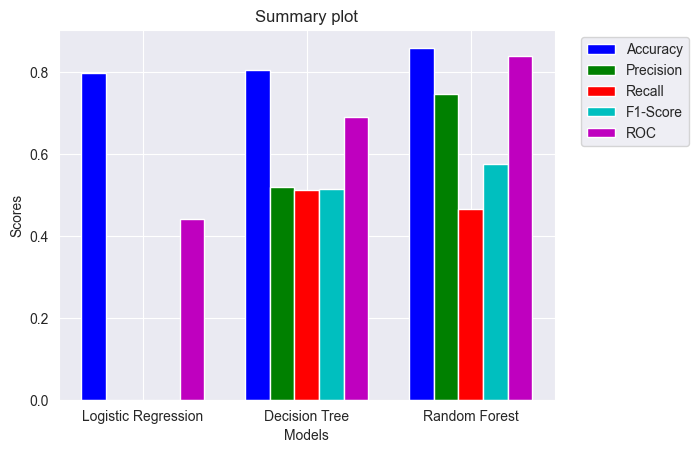

In [209]:
import matplotlib.pyplot as plt
import numpy as np

# Create the data
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']

accuracy = [0.7965, 0.804, 0.8590]
precision = [0.0000, 0.5187, 0.7470]
recall = [0.0000, 0.5111, 0.4644]
f1_score = [0.0000, 0.5148, 0.5753]
roc = [0.44, 0.69, 0.84]

# Set the bar width
bar_width = 0.15

# Set the x positions of the bars
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

# Create the plot
fig, ax = plt.subplots()
rects1 = ax.bar(r1, accuracy, bar_width, color='b', label='Accuracy')
rects2 = ax.bar(r2, precision, bar_width, color='g', label='Precision')
rects3 = ax.bar(r3, recall, bar_width, color='r', label='Recall')
rects4 = ax.bar(r4, f1_score, bar_width, color='c', label='F1-Score')
rects5 = ax.bar(r5, roc, bar_width, color='m', label='ROC')

# Add xticks on the middle of the group bars
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_xticks([r + bar_width*2 for r in range(len(models))])
ax.set_xticklabels(models)

# Set the legend outside the plot
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")

plt.title('Summary plot')
# Show the plot
plt.show()

In [216]:
x= [1,4,2,3]
x.sort()

In [217]:
x

[1, 2, 3, 4]

In [222]:
import datetime

In [218]:
from datetime import date

today = date.today()
print("Today's date:", today)

Today's date: 2023-04-17


In [225]:
print(today-datetime.timedelta(days=10)
)

2023-04-07


In [ ]:
from datetime import datetime

current_date = datetime.date.today()
due_date = current_date + datetime.timedelta(days=10)
date = due_date


In [228]:
my_dict = {'borrowed_books': '1', 'num_of_borrowed_books': '1',
           'name': '1', 'phone_number': '1', 'digital_address': '1'}
is_not_empty = all(val for val in my_dict.values())
print(is_not_empty)  # False


True
